# Mini Project 1

In [1]:
pip install aspose-words

Note: you may need to restart the kernel to use updated packages.


In [72]:
! pip install gensim==3.6.0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\a-zam\\AppData\\Roaming\\Python\\Python38\\site-packages\\~ensim\\corpora\\_mmreader.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Created wheel for gensim: filename=gensim-3.6.0-cp38-cp38-win_amd64.whl size=23701249 sha256=3c2fc8a951cdad9e6e5591f24b29ae64d0609538aea11d46a831422feae304ae
  Stored in directory: c:\users\a-zam\appdata\local\pip\cache\wheels\d6\5b\91\658efb08f9d790987e1ef3795e62e129868afb0fde409baac5
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.2.0
    Uninstalling gensim-4.2.0:
      Successfully uninstalled gensim-4.2.0


In [67]:
#necessary imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns
import aspose.words as aw
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors
import nltk
from nltk.tokenize import word_tokenize
import gensim.downloader as model_api
import json
import gensim
from gensim.models.wrappers import FastText

In [3]:
# create document object
doc = aw.Document()

# create a document builder object
builder = aw.DocumentBuilder(doc)

## 1. Dataset Preparation & Analysis

First its necessary to import our data

In [4]:
df=pd.read_json("goemotions.json")
df= df.rename(columns={0: "Text", 1:"Emotion",2:"Sentiment"})
df

Text     Emotion  \
0                                         That game hurt.     sadness   
1          You do right, if you don't care then fuck 'em!     neutral   
2                                      Man I love reddit.        love   
3       [NAME] was nowhere near them, he was by the Fa...     neutral   
4       Right? Considering it’s such an important docu...   gratitude   
...                                                   ...         ...   
171815  Well, I'm glad you're out of all that now. How...         joy   
171816                             Everyone likes [NAME].        love   
171817  Well when you’ve imported about a gazillion of...      caring   
171818                                 That looks amazing  admiration   
171819  The FDA has plenty to criticize. But like here...       anger   

       Sentiment  
0       negative  
1        neutral  
2       positive  
3        neutral  
4       positive  
...          ...  
171815  positive  
171816  positive  
171817  positive  
171818  positive  
171819  negative  

[171820 rows x 3 columns]

#### 1.3 
"Extract the posts and the 2 sets of labels (emotion and sentiment), then plot the distribution
of the posts in each category and save the graphic (a histogram or pie chart) in pdf. Do this for both
the emotion and the sentiment categories"

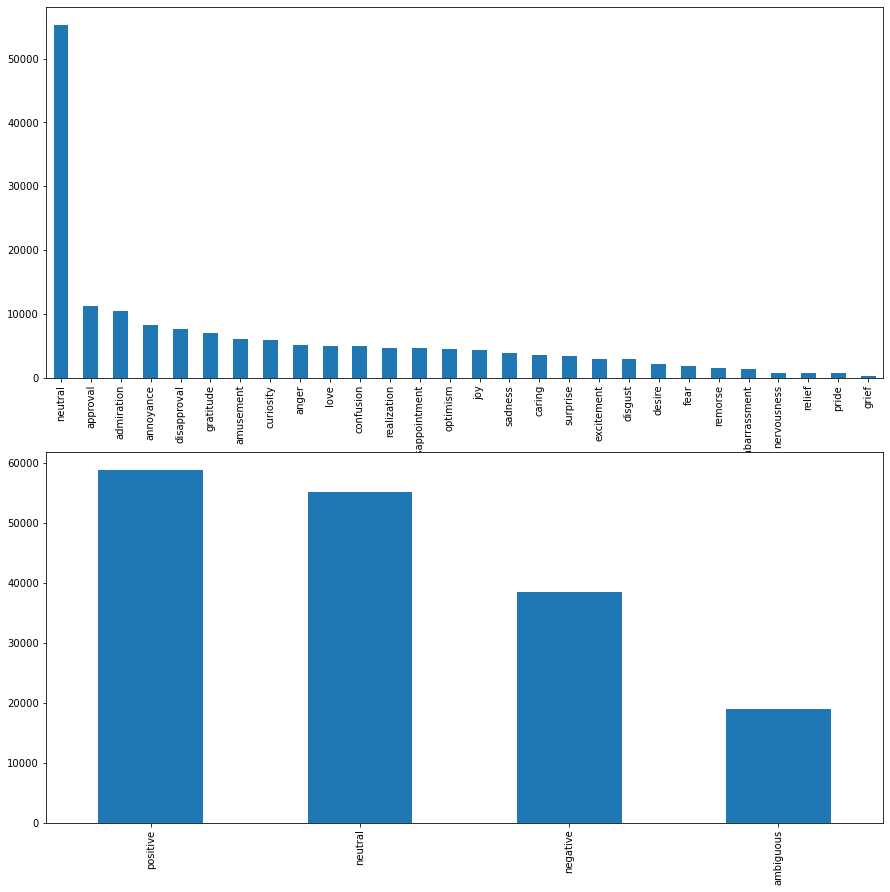

In [5]:
fig, ax = plt.subplots(2,1, figsize=(15,15))
df['Emotion'].value_counts().plot(ax=ax[0], kind='bar')
df['Sentiment'].value_counts().plot(ax=ax[1], kind='bar')

fig.savefig("graphs.pdf", bbox_inches='tight')

## 2. Words as Features

#### 2.1
"Process the dataset using feature extraction.text.CountVectorizer to extract tokens/words
and their frequencies. Display the number of tokens (the size of the vocabulary) in the dataset."

In [6]:
vectorizer = CountVectorizer(analyzer='word')
X = vectorizer.fit_transform(df['Text'])
y= df[['Sentiment','Emotion']]
print("The size of the vocabulary in this case is:", len(vectorizer.get_feature_names_out()))

The size of the vocabulary in this case is: 30449


#### 2.2

Split the dataset into 80% for training and 20% for testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### 2.3

"Train and test the following classifiers, for both the emotion and the sentiment classification, using word frequency as features."

###### 2.3.1 Multinomial Naive Bayes Classifier

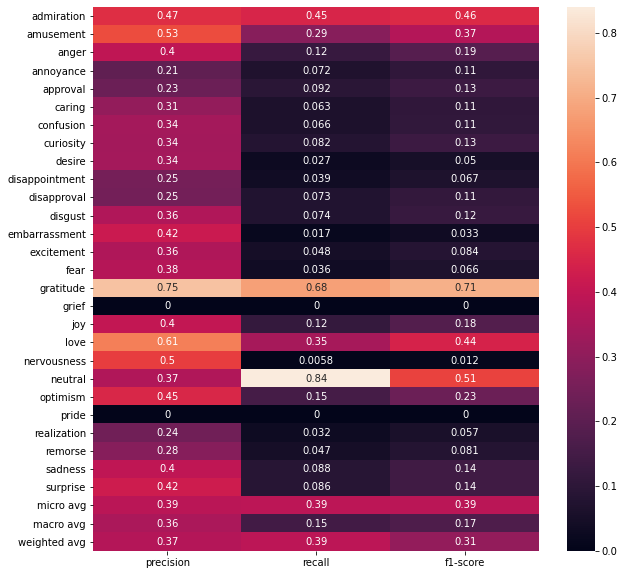

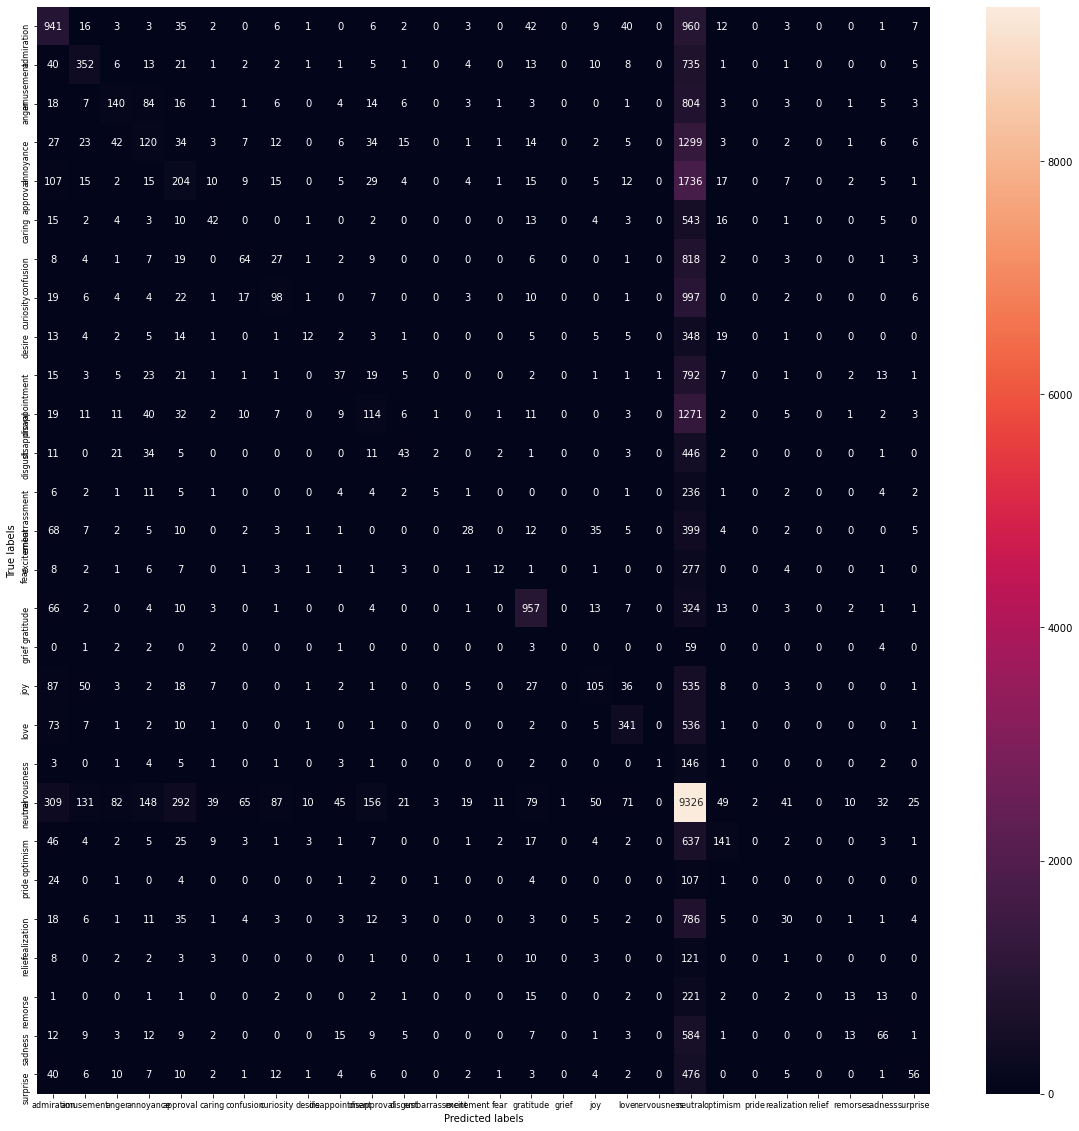

In [8]:
# Emotion
nb_emotion = MultinomialNB()
nb_emotion=nb_emotion.fit(X_train, y_train['Emotion'])
y_pred=nb_emotion.predict(X_test)

# Classification report for 2.4
description="Multinomial Naive Bayes classification of Emotion with default hyperparameters: alpha= 1.0, fit_prior= True,class_prior= None  \n"
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")


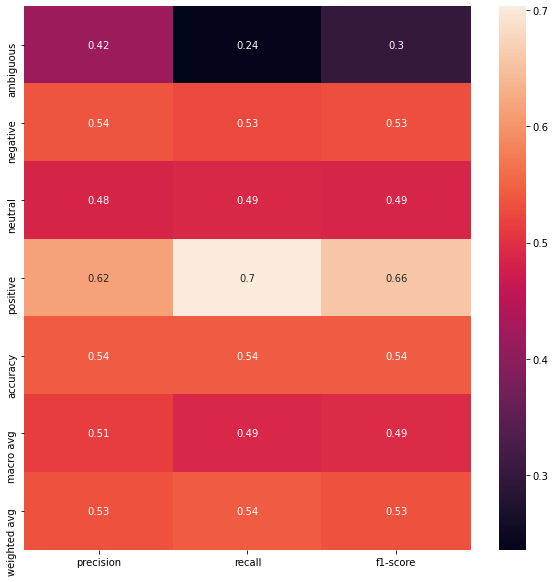

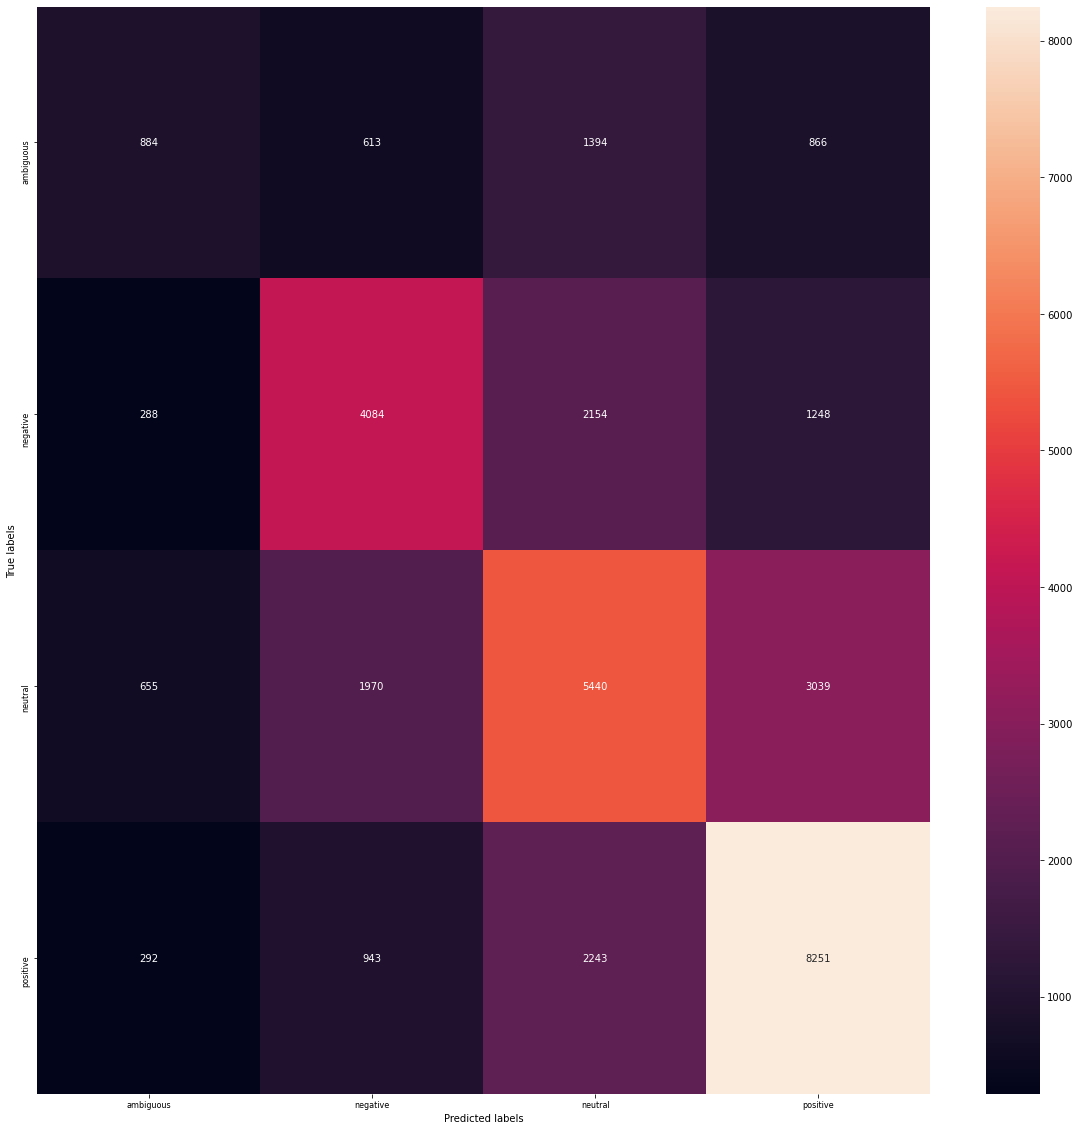

In [9]:
# Sentiment 
nb_sentiment = MultinomialNB()
nb_sentiment = nb_sentiment.fit(X_train, y_train['Sentiment'])
y_pred=nb_sentiment.predict(X_test)

# Classification report for 2.4
description="Multinomial Naive Bayes classification of Sentiment with default hyperparameters: alpha= 1.0, fit_prior= True,class_prior= None  \n"
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

###### 2.3.1 Decision Tree

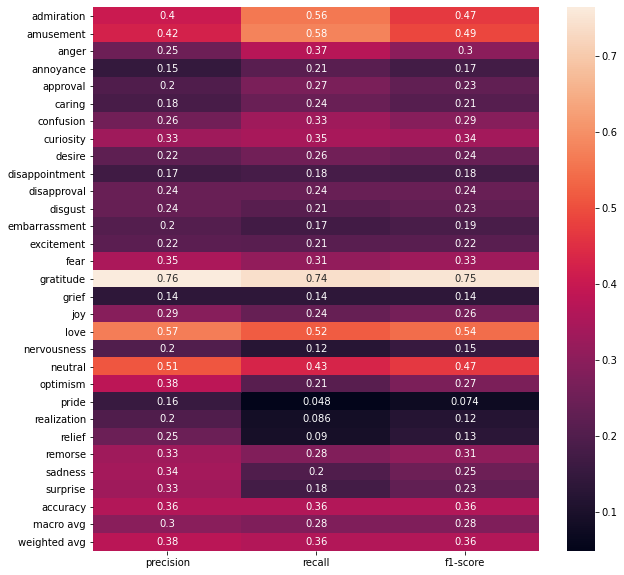

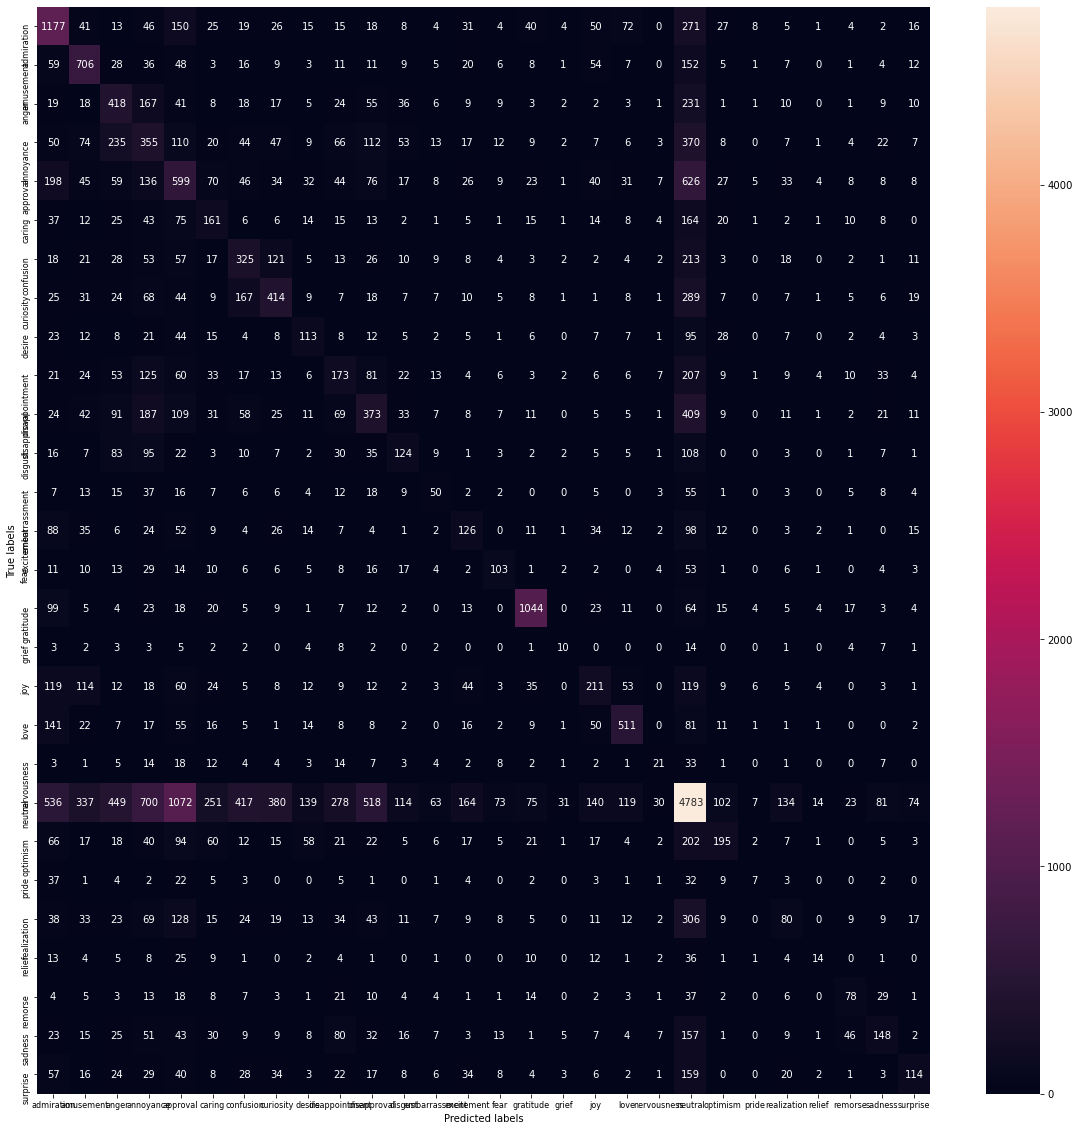

In [10]:
# Emotion
dt_emotion = DecisionTreeClassifier()
dt_emotion = dt_emotion.fit(X_train, y_train['Emotion'])
y_pred=dt_emotion.predict(X_test)

# Classification report for 2.4
description="Decision Tree classification of Emotion with default hyperparameters: criterion(quality of split)= 'gini'(Gini impurity), splitter= 'best' (choose the best split), max_depth=None, min_sample_leaf=1...  \n"
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

In [11]:
#get depth to take into account later
print("depth of tree", dt_emotion.tree_.max_depth)

depth of tree 1649


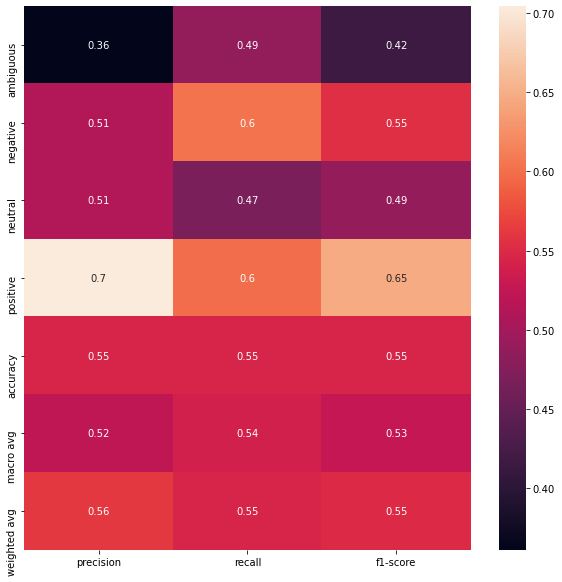

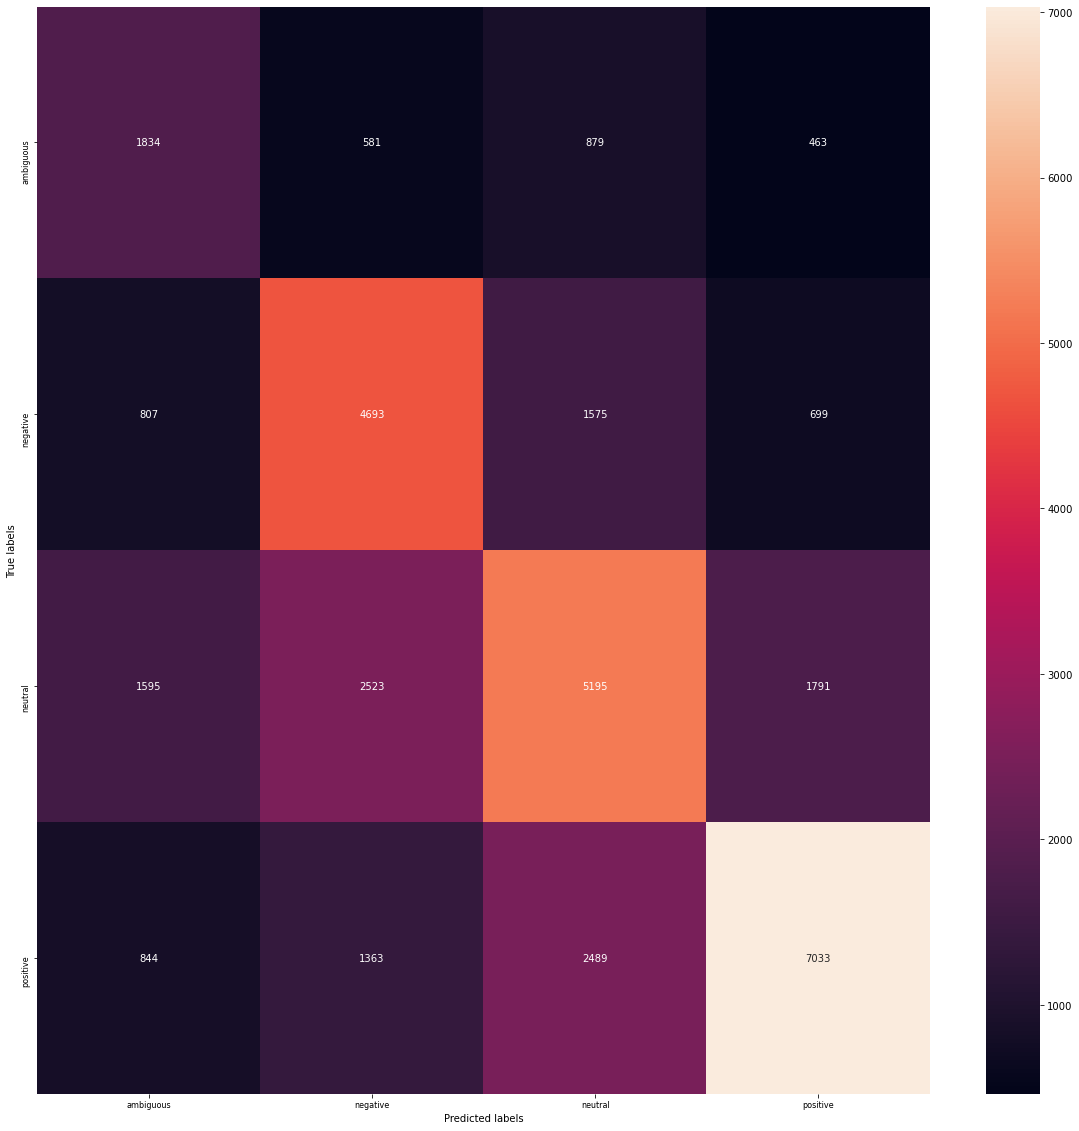

In [12]:
# Sentiment
dt_sentiment = DecisionTreeClassifier()
dt_sentiment = dt_sentiment.fit(X_train, y_train['Sentiment'])
y_pred=dt_sentiment.predict(X_test)
#takes a long time to run

# Classification report for 2.4
description="Decision Tree classification of Sentiment with default hyperparameters: criterion(quality of split)= 'gini'(Gini impurity), splitter= 'best' (choose the best split), max_depth=None, min_sample_leaf=1...  \n"
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

In [13]:
#get depth to take into account later
print("depth of tree", dt_sentiment.tree_.max_depth)

depth of tree 1564


###### 2.3.1 Multi-Layered Perceptron

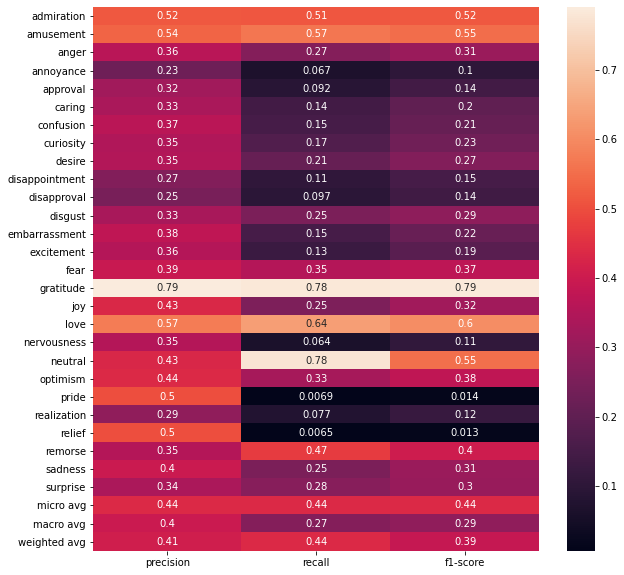

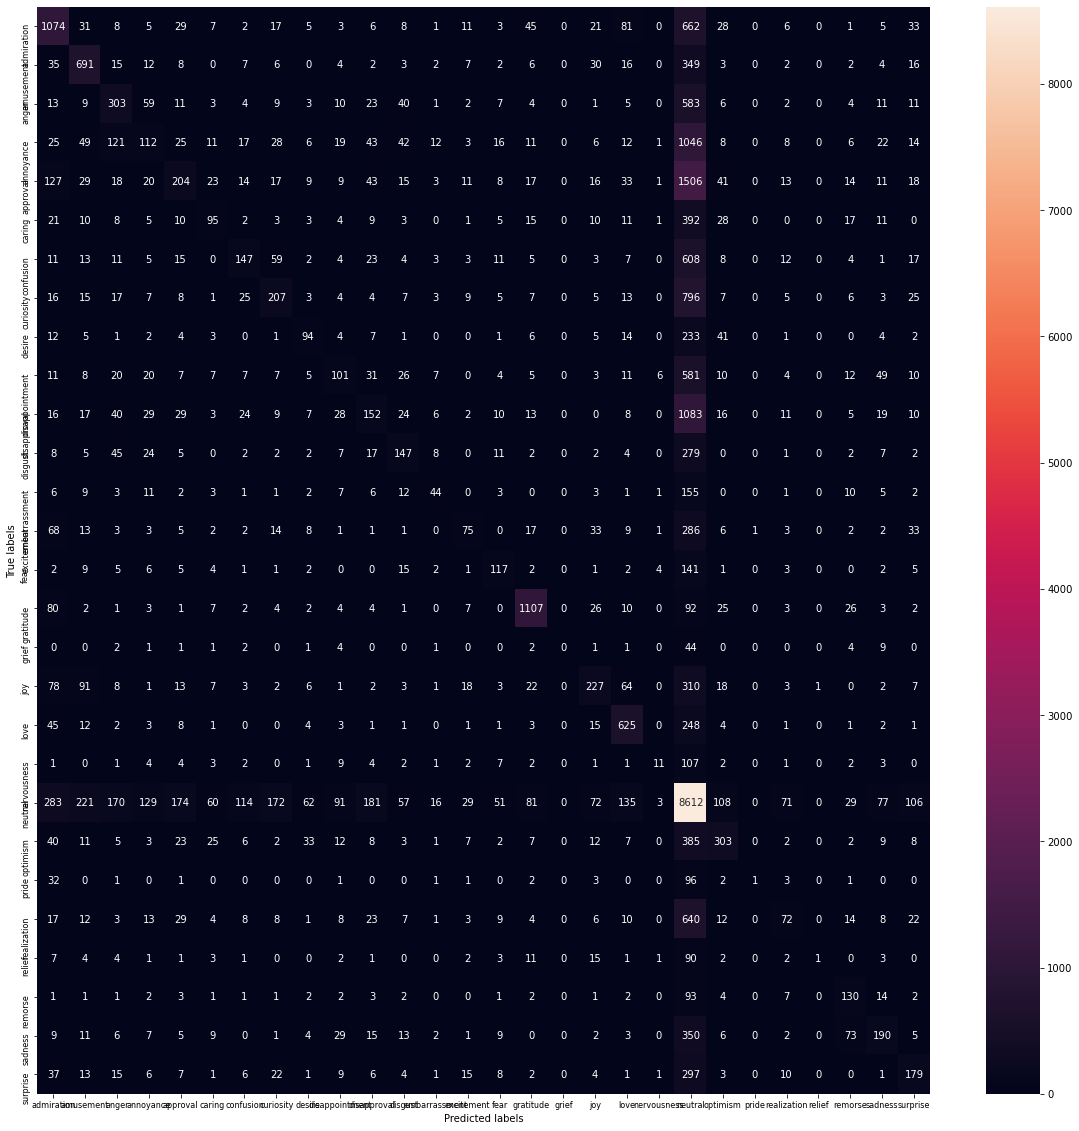

In [14]:
# Emotion
mlp_emotion = MLPClassifier(max_iter=100,early_stopping=True)
mlp_emotion= mlp_emotion.fit(X_train, y_train['Emotion'])
y_pred=mlp_emotion.predict(X_test)

# Classification report for 2.4
description="Multi-Layered perceptron classificator for Emotion with default hyperparameters: one hidden layer with 100 neurons, activation= 'relu',solver='adam', alpha(regularization)=0.0001... \n"
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

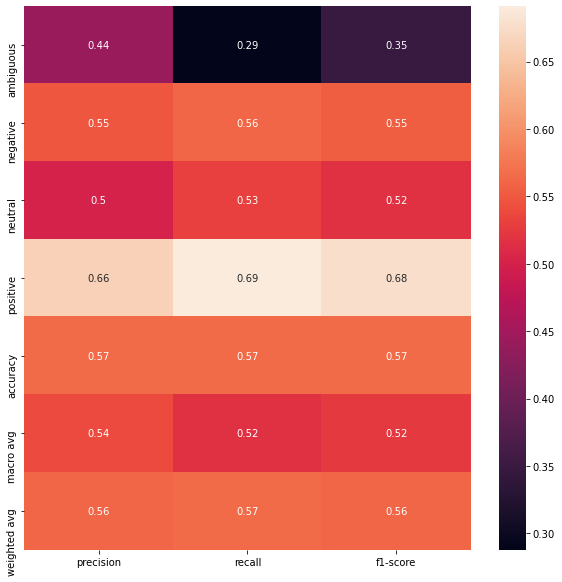

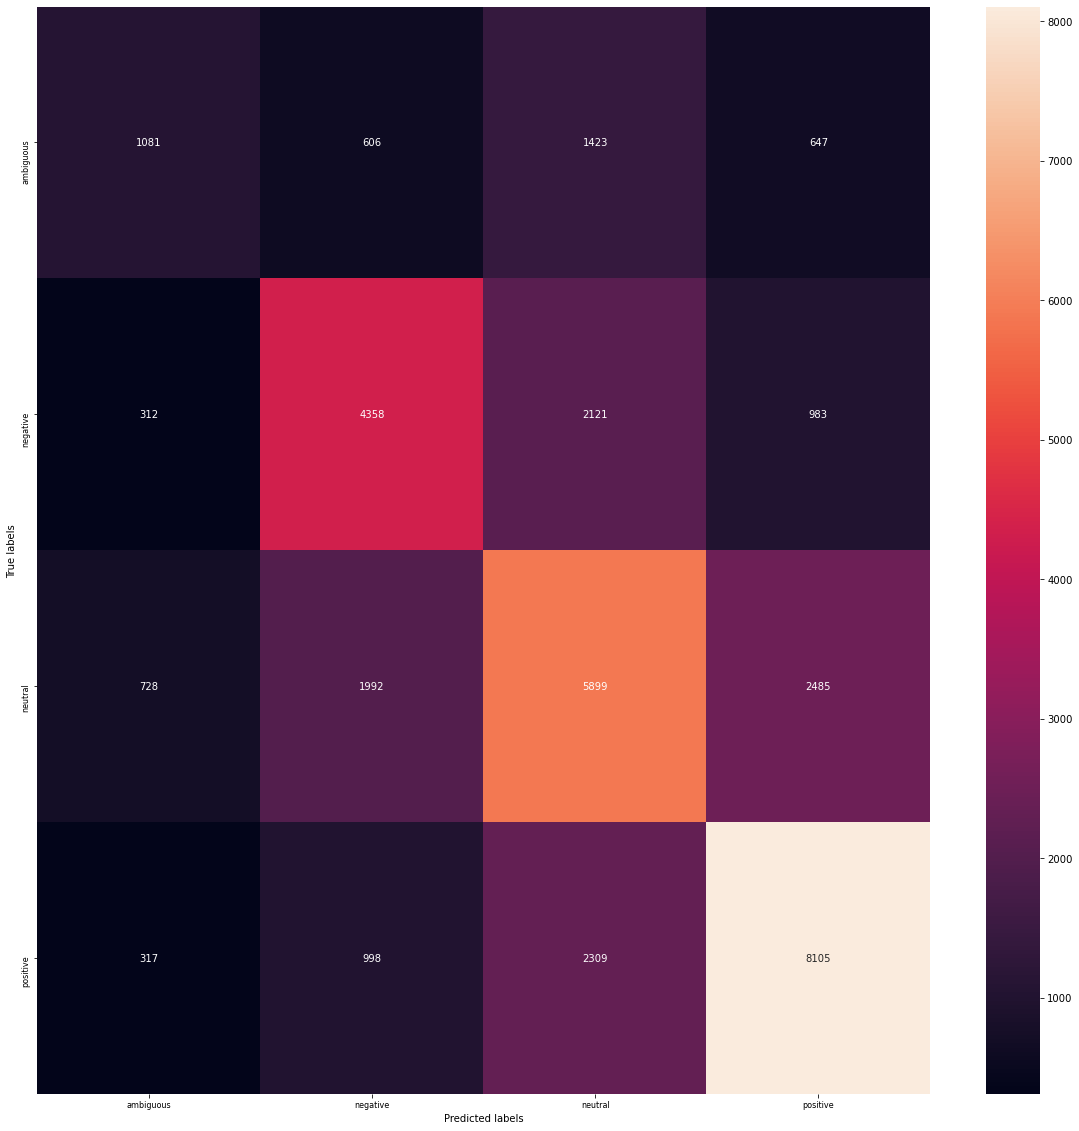

In [15]:
# Sentiment
mlp_sentiment = MLPClassifier(max_iter=100,early_stopping=True)
mlp_sentiment= mlp_sentiment.fit(X_train, y_train['Sentiment'])
y_pred=mlp_sentiment.predict(X_test)

# Classification report for 2.4
description="Multi-Layered perceptron classificator for Sentiment with default hyperparameters: one hidden layer with 100 neurons, activation= 'relu',solver='adam', alpha(regularization)=0.0001... \n"
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")


###### 2.3.4 **Better** Multinomial Naive Bayes Classifier

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'alpha': 0.5}


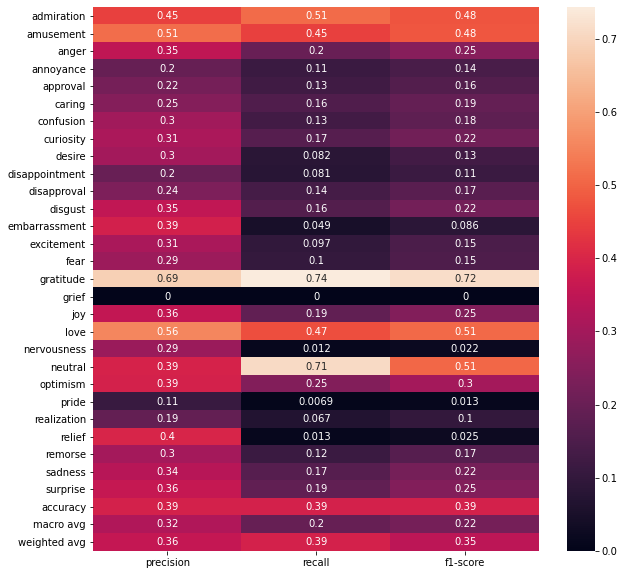

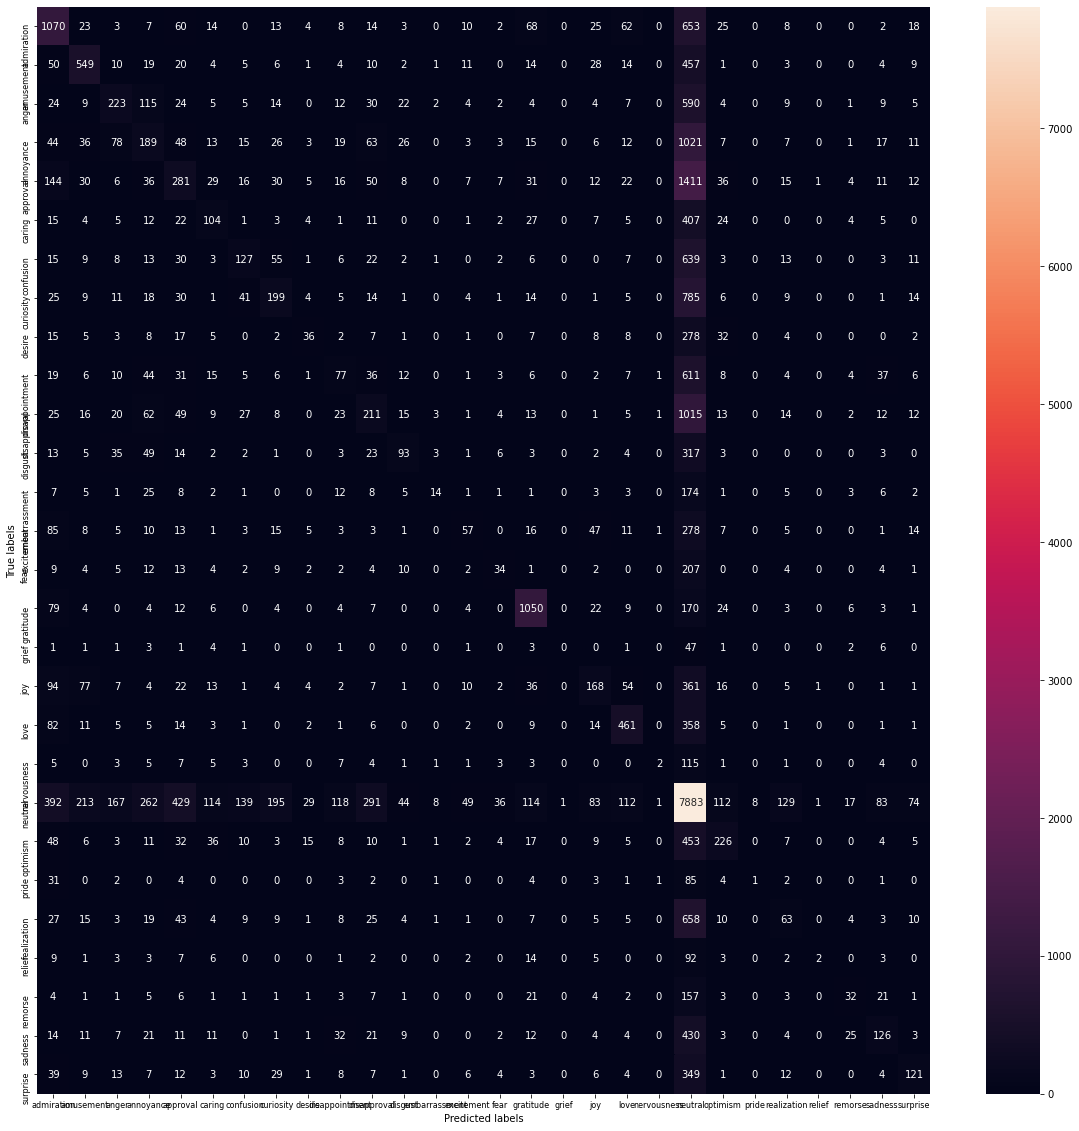

In [16]:
# Emotion
nb_emotion = MultinomialNB()


param_grid = {
    "alpha": [0.25,0.5,1.2, 0, 2]
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train['Emotion'])

# best parameter after tuning 
print(grid_search.best_params_) 
y_pred = grid_search.predict(X_test) 
   
# Classification report for 2.4
description="Better Multinomial Naive Bayes for emotion classification with hyperparameters tunned by grid search:"+json.dumps(grid_search.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")
    
    
    



Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'alpha': 1.2}


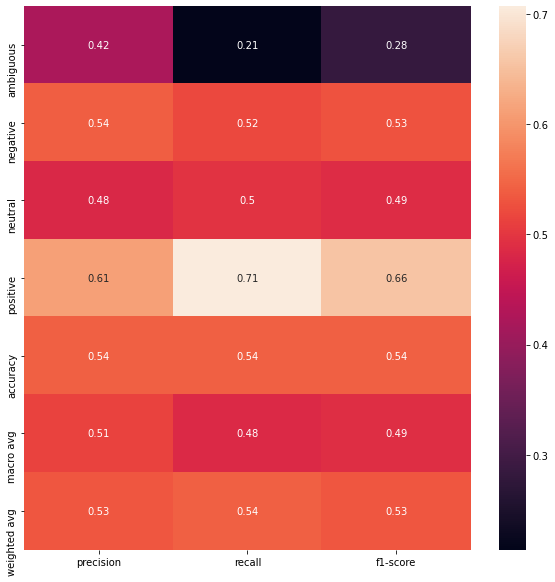

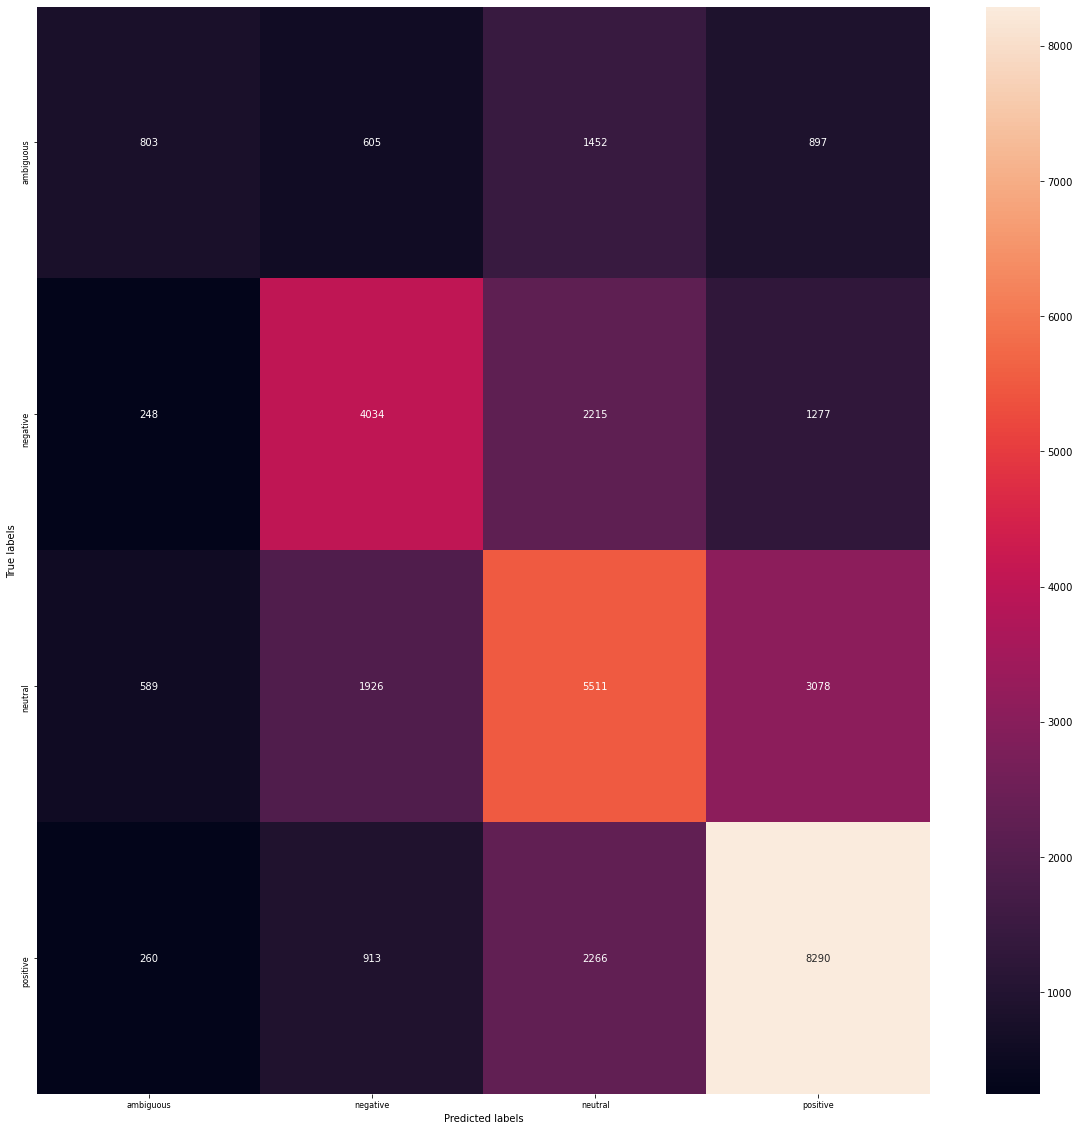

In [17]:
# Sentiment

param_grid = {
    "alpha": [0.25,0.5,1.2, 0, 2]
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train['Sentiment'])

# best parameter after tuning 
print(grid_search.best_params_) 
y_pred = grid_search.predict(X_test) 
   
# Classification report for 2.4
description="Better Multinomial Naive Bayes for sentiment classification with hyperparameters tunned by grid search:"+json.dumps(grid_search.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")


###### 2.3.4 **Better** Decision Tree

dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__random_state', 'estimator__splitter', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'criterion': 'gini', 'max_depth': 700, 'min_samples_split': 0.1}


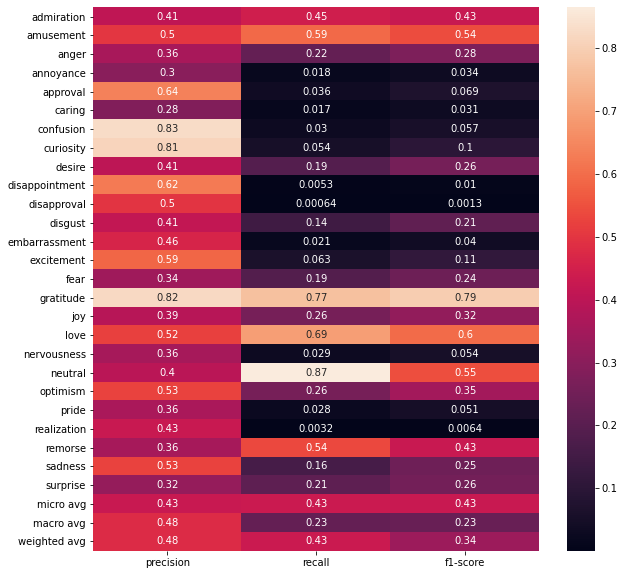

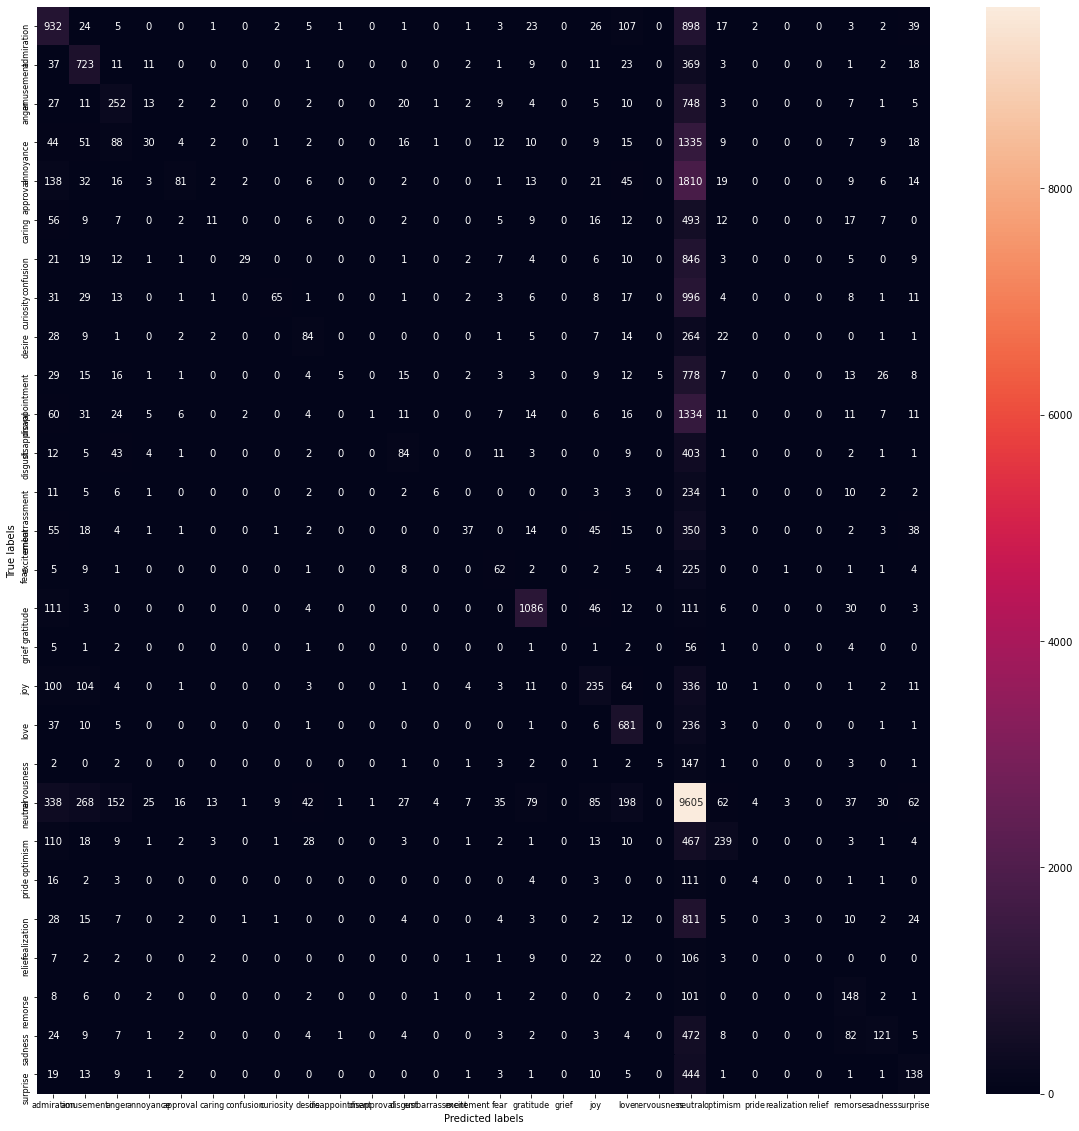

In [18]:
# Emotion
param_grid = {
    "criterion":["gini","entropy"],
    "max_depth":[700, 1000],
    "min_samples_split":[0.1,0.50,0.70]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, verbose=2, n_jobs=-1)
print(grid_search.get_params().keys())
grid_search.fit(X_train, y_train['Emotion'])

# best parameter after tuning 
print(grid_search.best_params_) 
y_pred = grid_search.predict(X_test) 
   
# Classification report for 2.4
description="Better Desicion Tree for emotion classification with hyperparameters tunned by grid search:"+json.dumps(grid_search.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")


dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__random_state', 'estimator__splitter', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'criterion': 'gini', 'max_depth': 700, 'min_samples_split': 0.1}


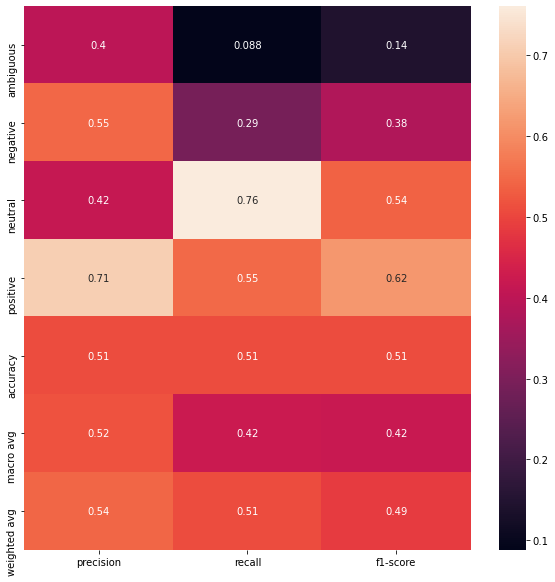

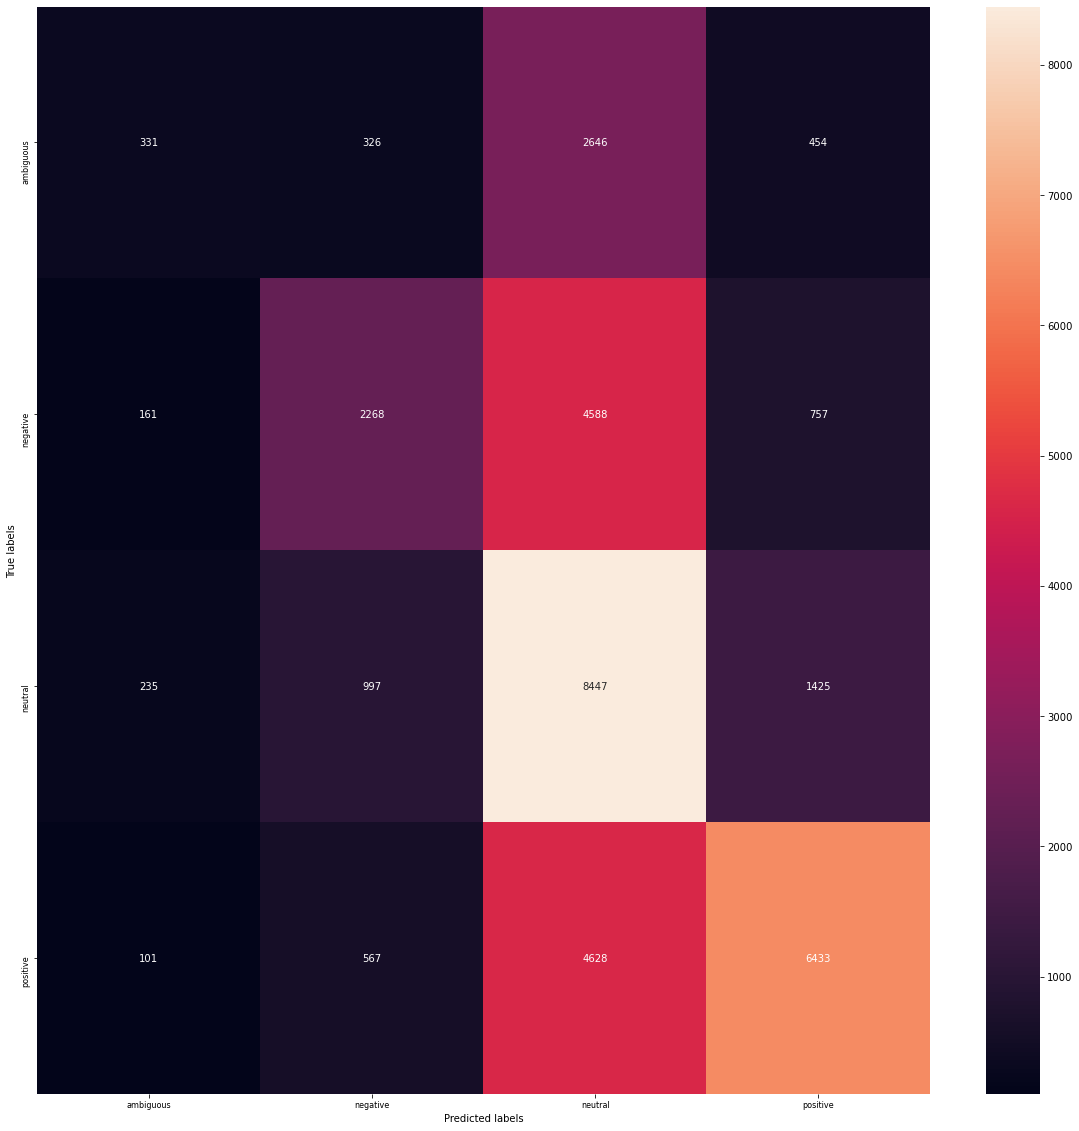

In [19]:
# Sentiment
param_grid = {
    "criterion":["gini","entropy"],
    "max_depth":[700, 1000],
    "min_samples_split":[0.1,0.50,0.70]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, verbose=2, n_jobs=-1)
print(grid_search.get_params().keys())
grid_search.fit(X_train, y_train['Sentiment'])

# best parameter after tuning 
print(grid_search.best_params_) 
y_pred = grid_search.predict(X_test) 
   
# Classification report for 2.4
description="Better Desicion Tree Classifier for Sentiment classification with hyperparameters tunned by grid search:"+json.dumps(grid_search.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")



###### 2.3.4 **Better** Multilayered Perceptron

dict_keys(['cv', 'error_score', 'estimator__activation', 'estimator__alpha', 'estimator__batch_size', 'estimator__beta_1', 'estimator__beta_2', 'estimator__early_stopping', 'estimator__epsilon', 'estimator__hidden_layer_sizes', 'estimator__learning_rate', 'estimator__learning_rate_init', 'estimator__max_fun', 'estimator__max_iter', 'estimator__momentum', 'estimator__n_iter_no_change', 'estimator__nesterovs_momentum', 'estimator__power_t', 'estimator__random_state', 'estimator__shuffle', 'estimator__solver', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'activation': 'tanh', 'hidden_layer_sizes': (4, 50), 'solver': 'sgd'}


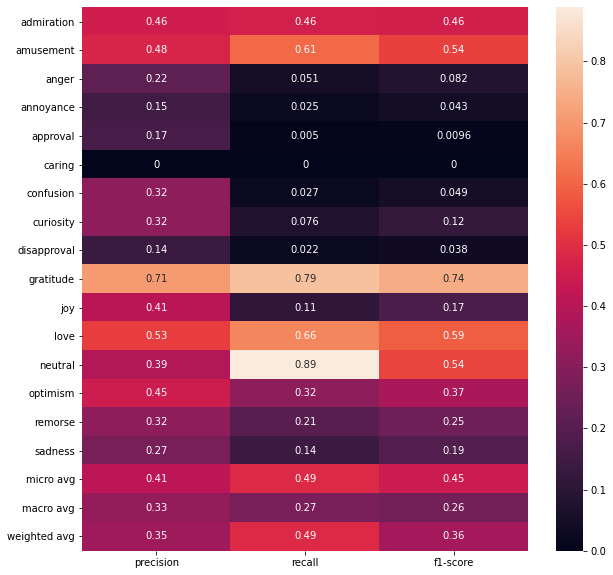

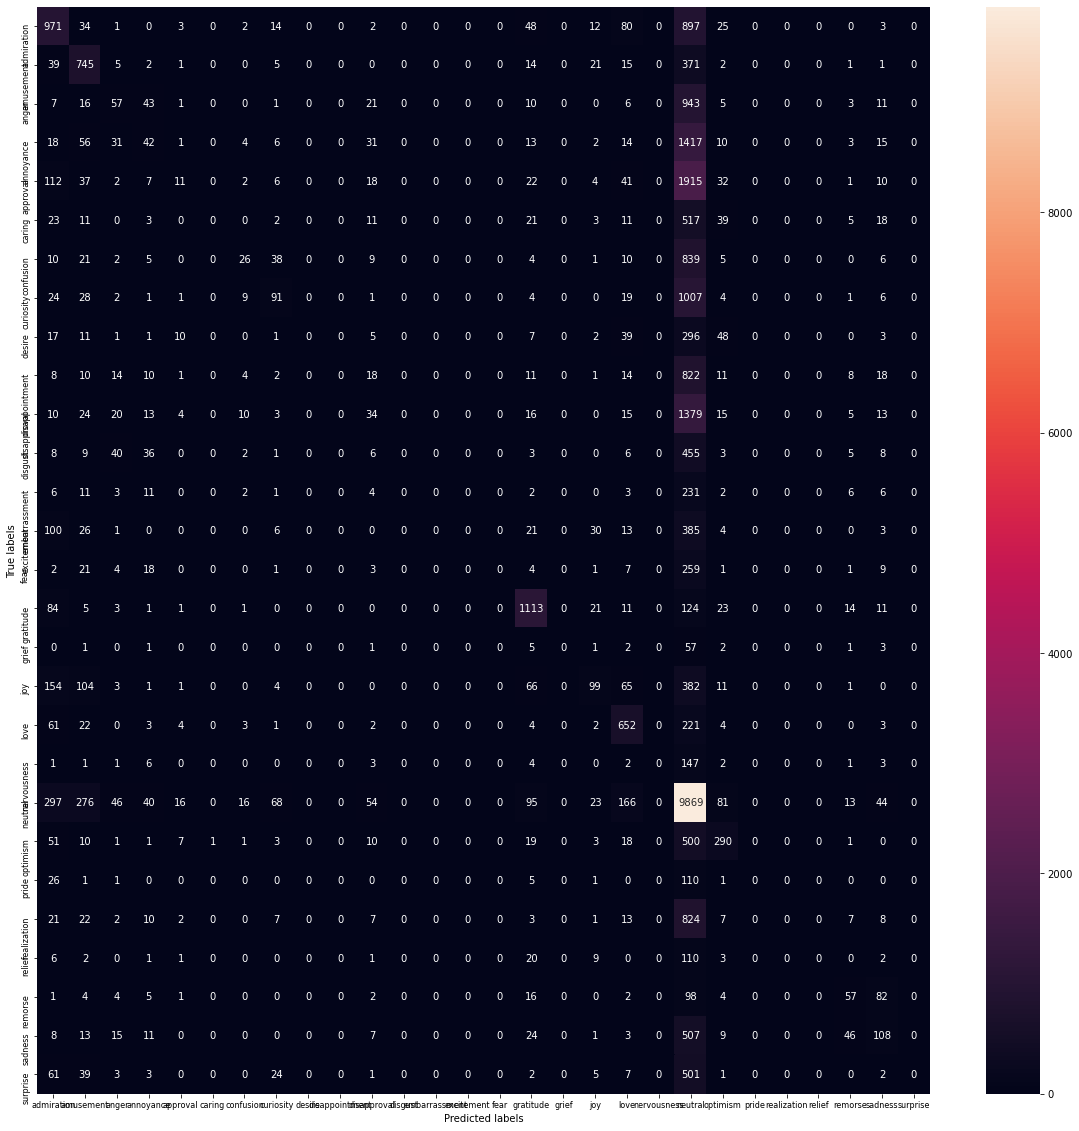

In [20]:
# Emotion
param_grid = {
    "activation":['logistic', 'identity', 'tanh', 'relu'],
    "hidden_layer_sizes":[(1,300), (4,50)],
    "solver":['adam','sgd']
}

grid_search = GridSearchCV(MLPClassifier(max_iter=100,early_stopping=True), param_grid, cv=3, verbose=2, n_jobs=-1)
print(grid_search.get_params().keys())
grid_search.fit(X_train, y_train['Emotion'])

# best parameter after tuning 
print(grid_search.best_params_) 
y_pred = grid_search.predict(X_test) 
   
# Classification report for 2.4
description="Better Multilayered Perceptron for emotion classification with hyperparameters tunned by grid search:"+json.dumps(grid_search.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")



dict_keys(['cv', 'error_score', 'estimator__activation', 'estimator__alpha', 'estimator__batch_size', 'estimator__beta_1', 'estimator__beta_2', 'estimator__early_stopping', 'estimator__epsilon', 'estimator__hidden_layer_sizes', 'estimator__learning_rate', 'estimator__learning_rate_init', 'estimator__max_fun', 'estimator__max_iter', 'estimator__momentum', 'estimator__n_iter_no_change', 'estimator__nesterovs_momentum', 'estimator__power_t', 'estimator__random_state', 'estimator__shuffle', 'estimator__solver', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'activation': 'tanh', 'hidden_layer_sizes': (4, 50), 'solver': 'adam'}


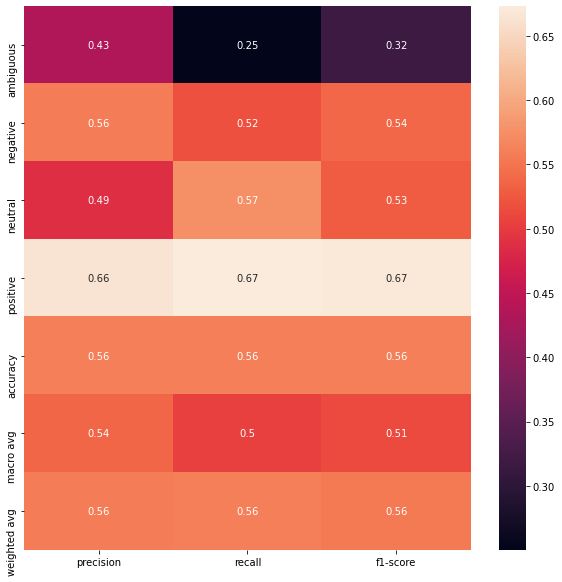

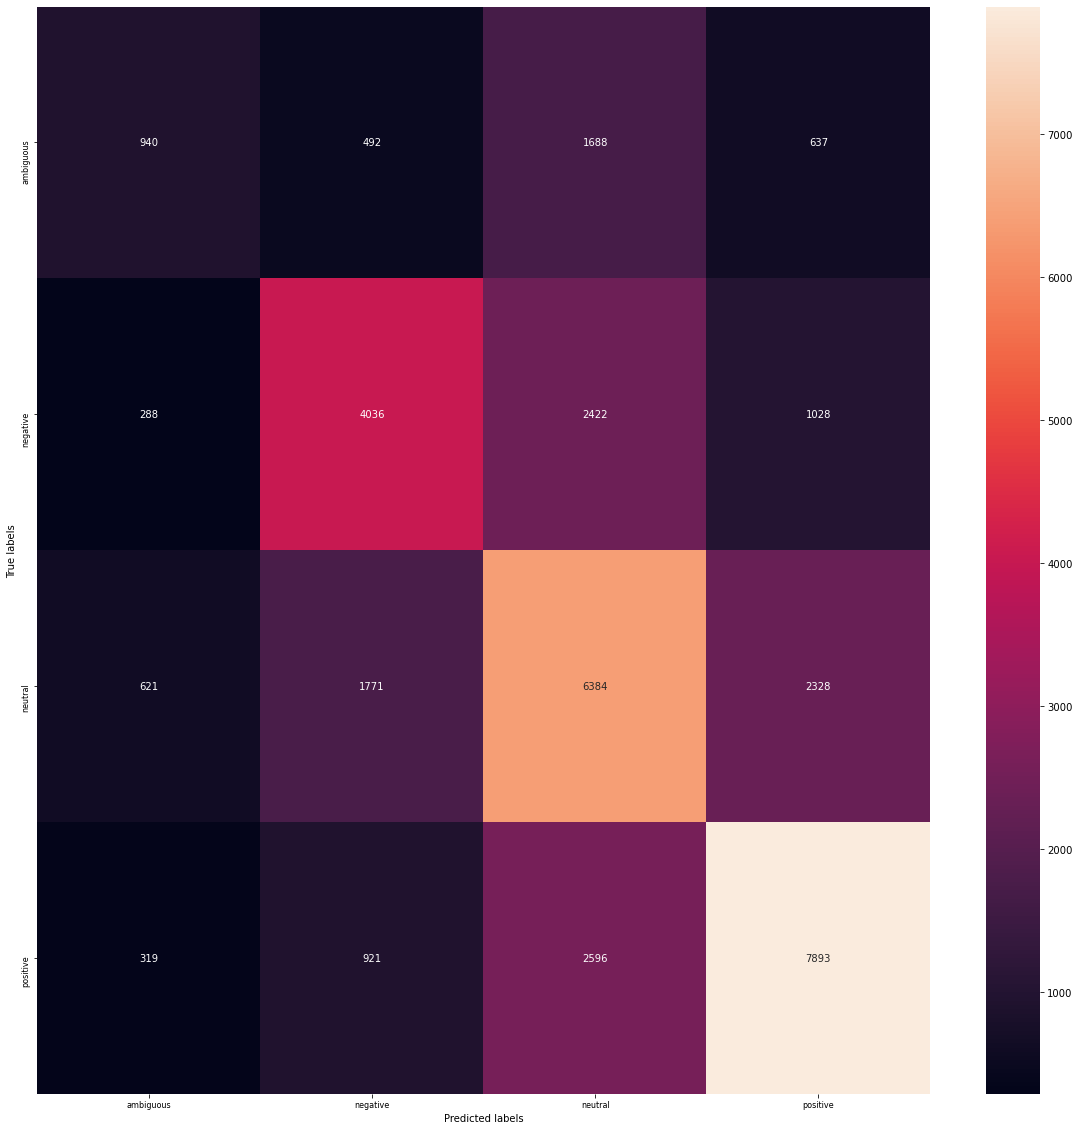

In [21]:
# Sentiment
param_grid = {
    "activation":['logistic', 'identity', 'tanh', 'relu'],
    "hidden_layer_sizes":[(1,300), (4,50)],
    "solver":['adam','sgd']
}

grid_search = GridSearchCV(MLPClassifier(max_iter=100,early_stopping=True), param_grid, cv=3, verbose=2, n_jobs=-1)
print(grid_search.get_params().keys())
grid_search.fit(X_train, y_train['Sentiment'])

# best parameter after tuning 
print(grid_search.best_params_) 
y_pred = grid_search.predict(X_test) 
   
# Classification report for 2.4
description="Better Multilayered Perceptron for sentiment classification with hyperparameters tunned by grid search:"+json.dumps(grid_search.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Sentiment'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")



###### 2.4 Produce and save the following information in a file called performance

In [22]:
# save document
#doc.save("performance.docx")
#we are going to save the document later

###### 2.5  Use tf-idf instead of word frequencies and redo all substeps of 2.3 above

In [23]:
vectorizer = TfidfVectorizer()
X= vectorizer.fit_transform(df['Text'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
builder.writeln("2.5 Repetition of steps of 2.3 with tf-idf")

###### 2.5.1 Multinomial Naive Bayes Classifier with tf-idf




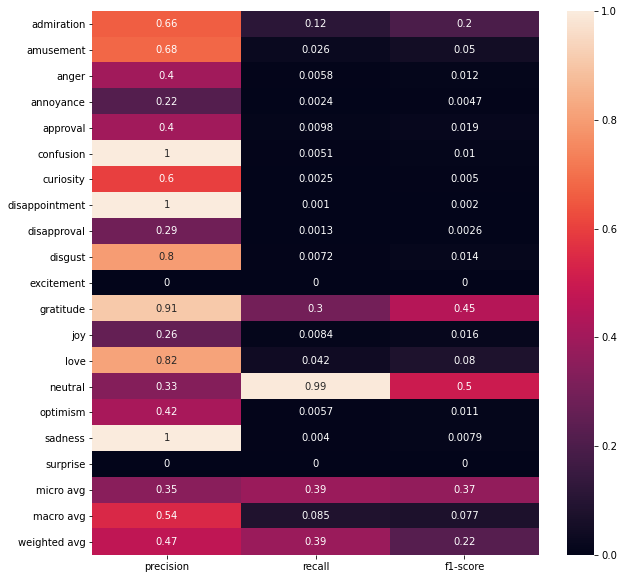

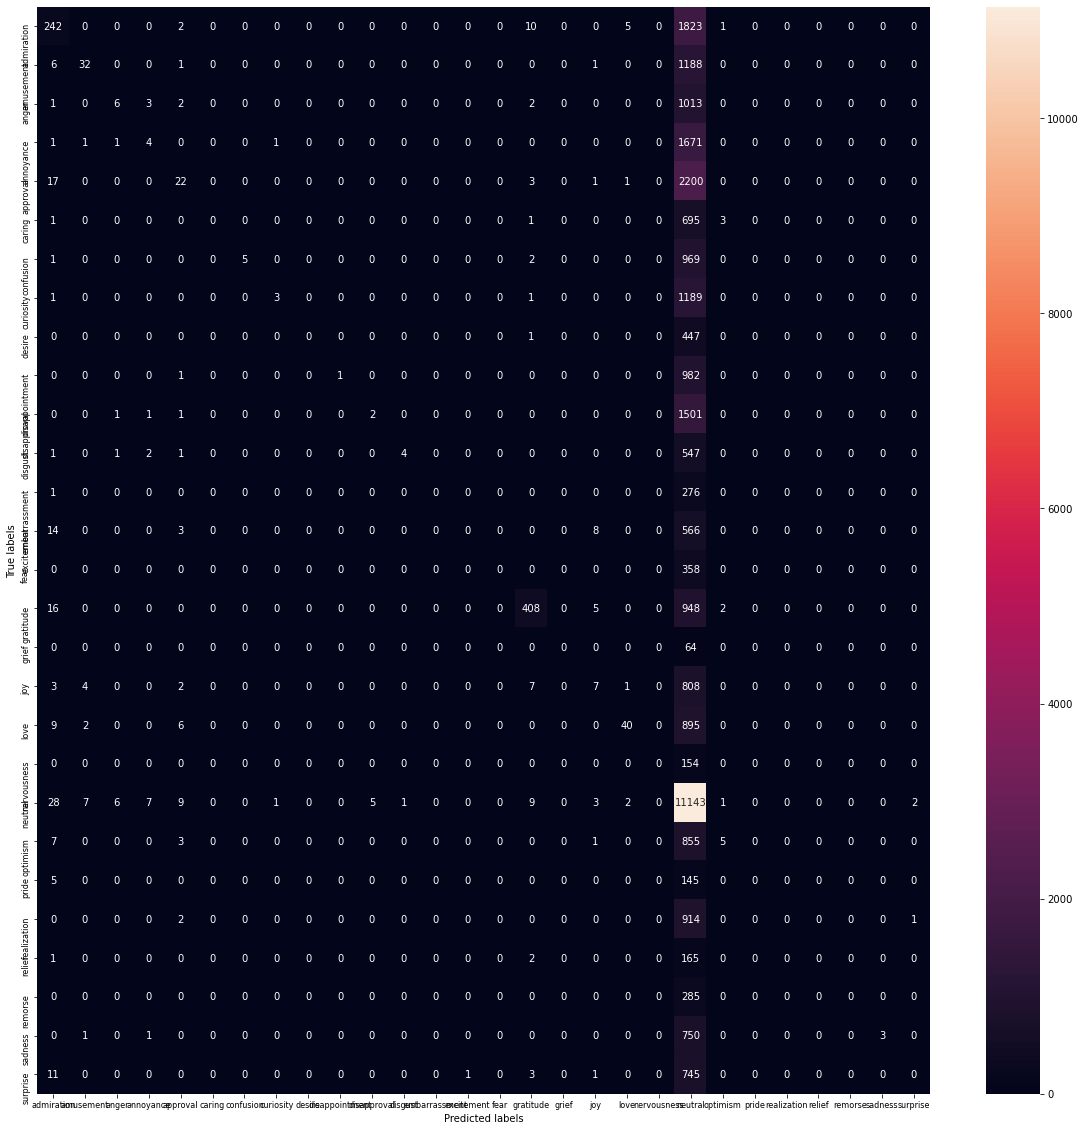

In [24]:
# Emotion
nb_emotion = MultinomialNB()
nb_emotion=nb_emotion.fit(X_train, y_train['Emotion'])
y_pred=nb_emotion.predict(X_test)

# Classification report for 2.4
description="Multinomial Naive Bayes classification of Emotion with default hyperparameters: alpha= 1.0, fit_prior= True,class_prior= None  \n"
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")


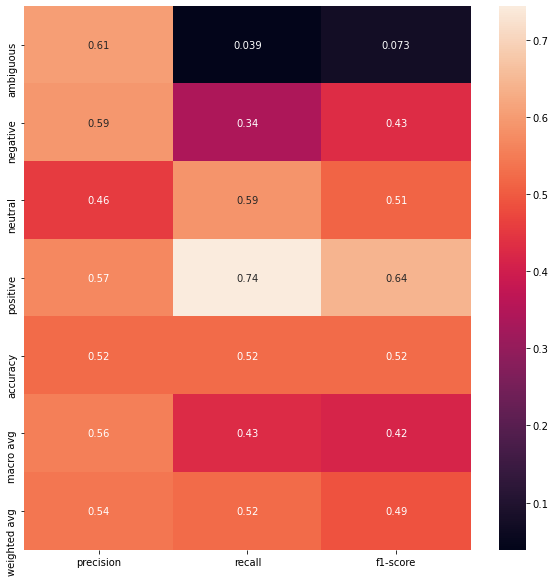

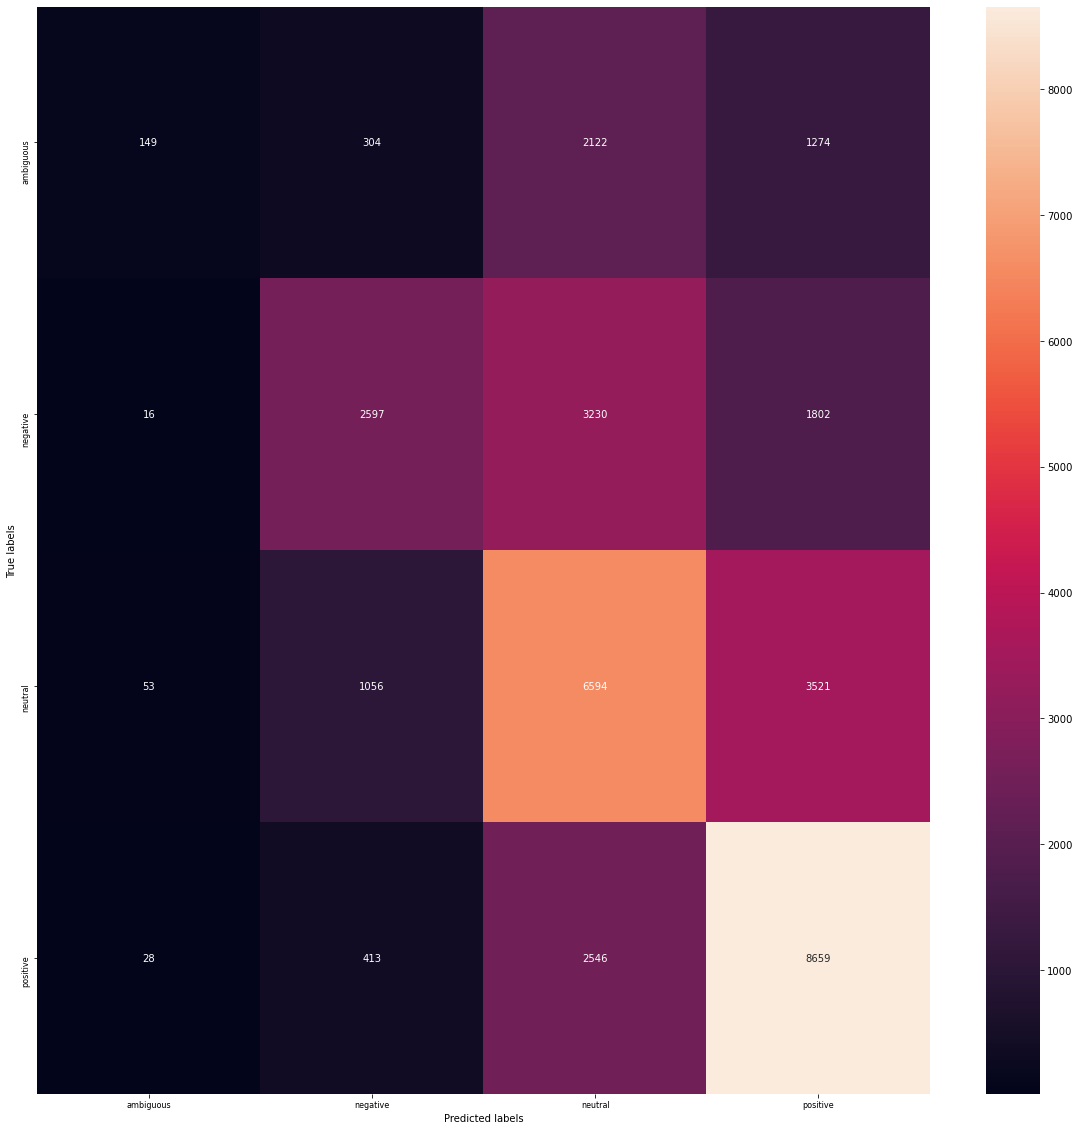

In [25]:
# Sentiment 
nb_sentiment = MultinomialNB()
nb_sentiment = nb_sentiment.fit(X_train, y_train['Sentiment'])
y_pred=nb_sentiment.predict(X_test)

# Classification report for 2.4
description="Multinomial Naive Bayes classification of Sentiment with default hyperparameters: alpha= 1.0, fit_prior= True,class_prior= None  \n"
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

###### 2.5.2 Decision Tree with tf-idf

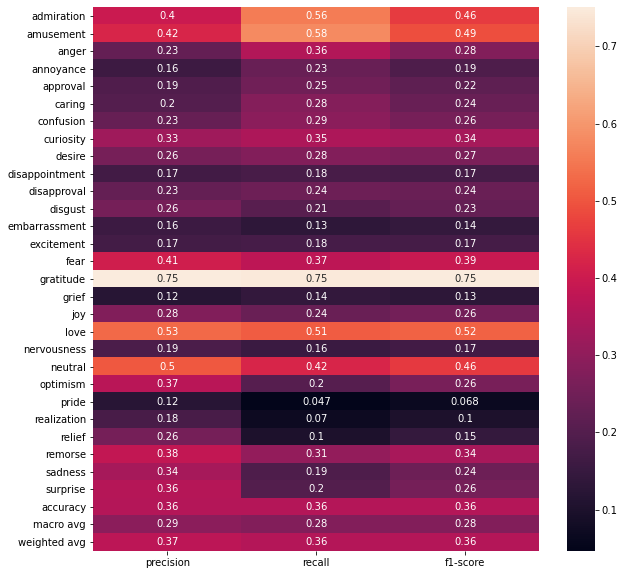

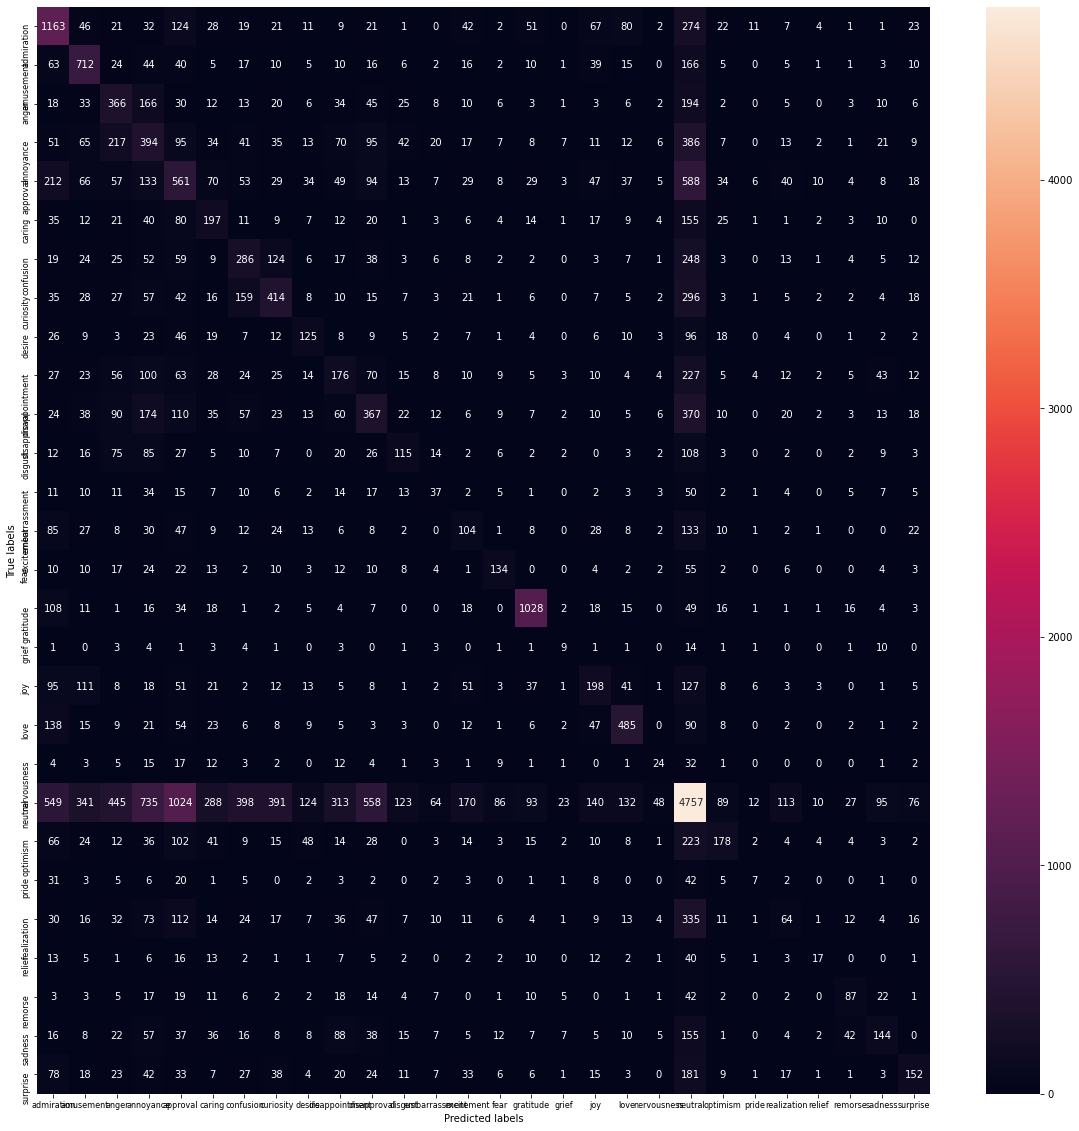

In [26]:
# Emotion
dt_emotion = DecisionTreeClassifier()
dt_emotion = dt_emotion.fit(X_train, y_train['Emotion'])
y_pred=dt_emotion.predict(X_test)

# Classification report for 2.4
description="Decision Tree classification of Emotion with default hyperparameters: criterion(quality of split)= 'gini'(Gini impurity), splitter= 'best' (choose the best split), max_depth=None, min_sample_leaf=1...  \n"
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

In [27]:
#get depth to take into account later
print("depth of tree", dt_emotion.tree_.max_depth)

depth of tree 1433


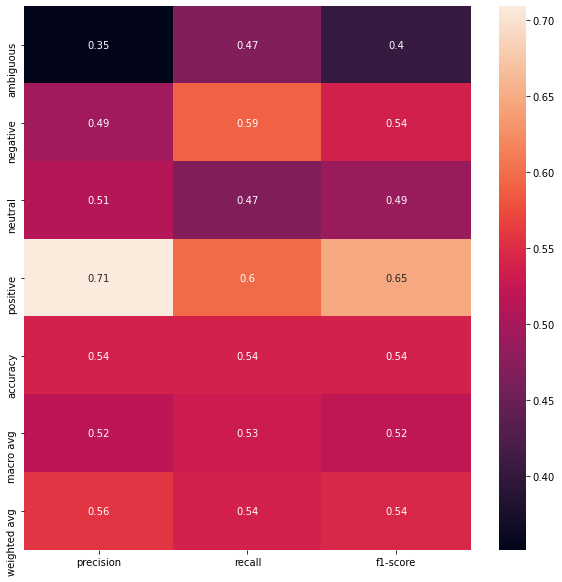

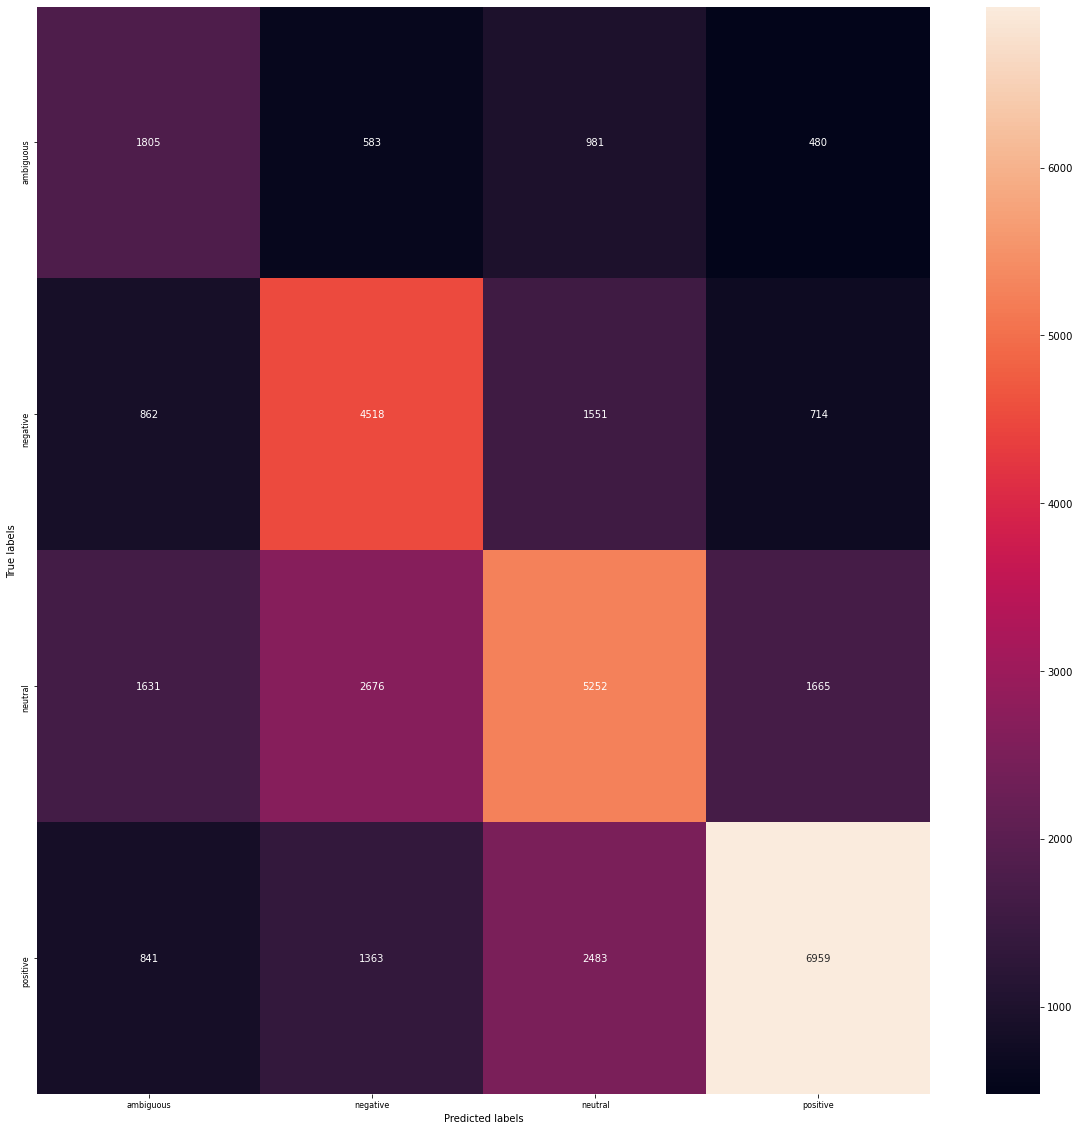

In [28]:
# Sentiment
dt_sentiment = DecisionTreeClassifier()
dt_sentiment = dt_sentiment.fit(X_train, y_train['Sentiment'])
y_pred=dt_sentiment.predict(X_test)
#takes a long time to run

# Classification report for 2.4
description="Decision Tree classification of Sentiment with default hyperparameters: criterion(quality of split)= 'gini'(Gini impurity), splitter= 'best' (choose the best split), max_depth=None, min_sample_leaf=1...  \n"
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

In [29]:
#get depth to take into account later
print("depth of tree", dt_sentiment.tree_.max_depth)

depth of tree 1420


###### 2.5.3 Multi-Layered Perceptron with tf-idf

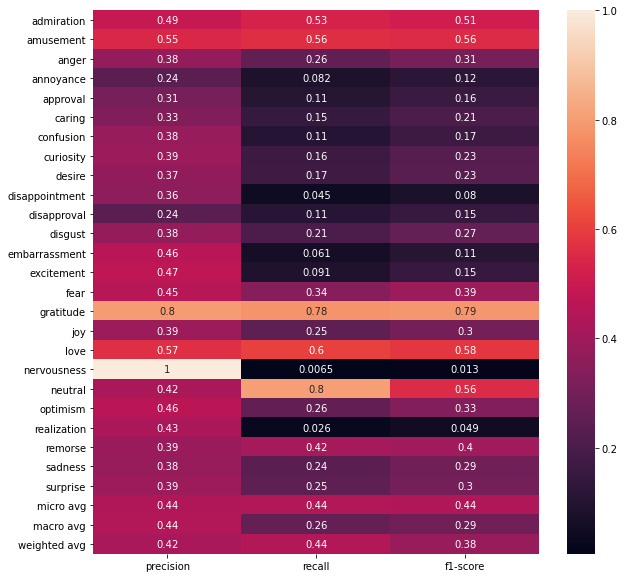

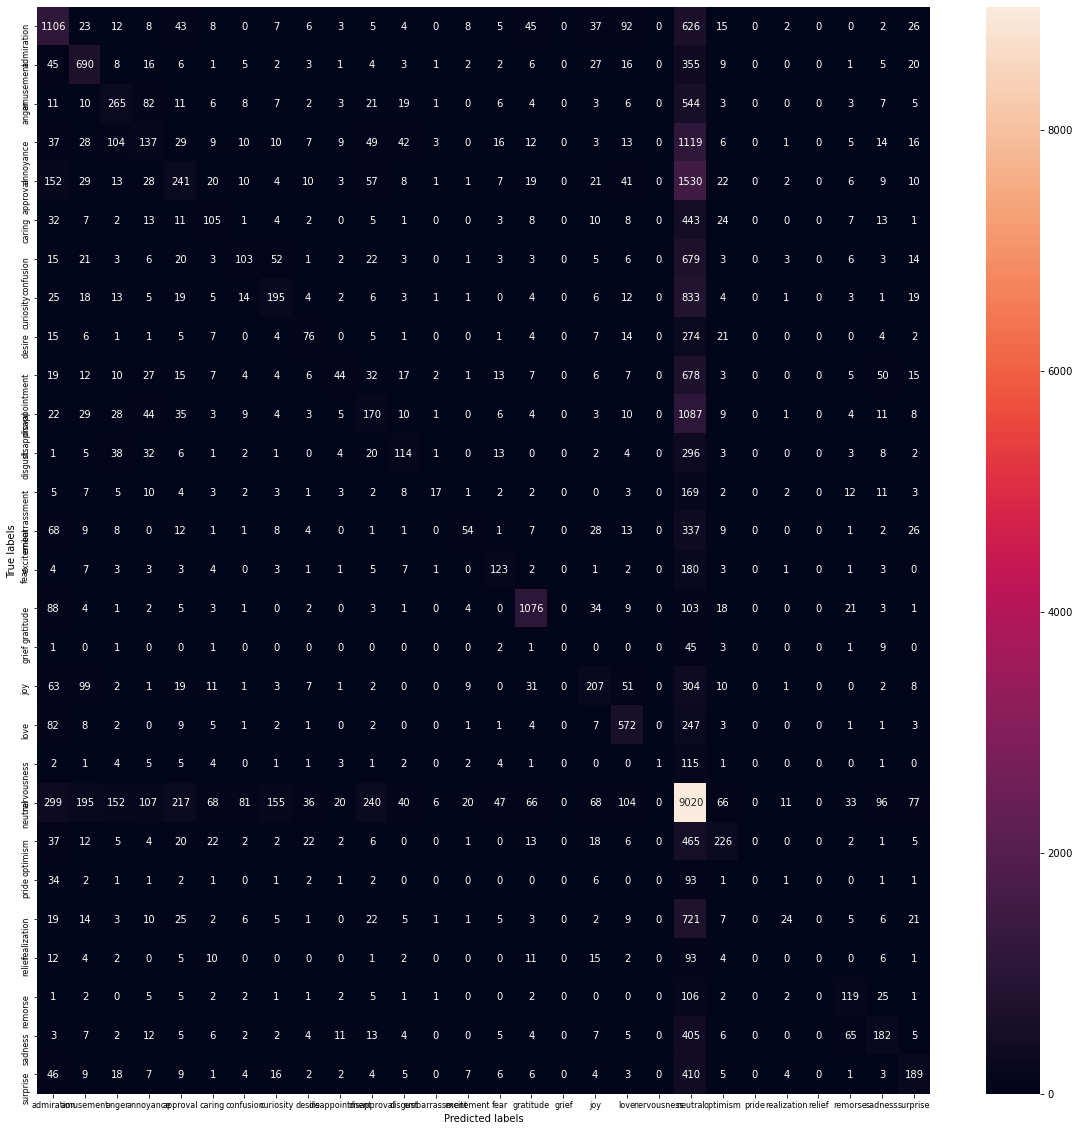

In [30]:
# Emotion
mlp_emotion = MLPClassifier(max_iter=100,early_stopping=True)
mlp_emotion= mlp_emotion.fit(X_train, y_train['Emotion'])
y_pred=mlp_emotion.predict(X_test)

# Classification report for 2.4
description="Multi-Layered perceptron classificator for Emotion with default hyperparameters: one hidden layer with 100 neurons, activation= 'relu',solver='adam', alpha(regularization)=0.0001... \n"
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

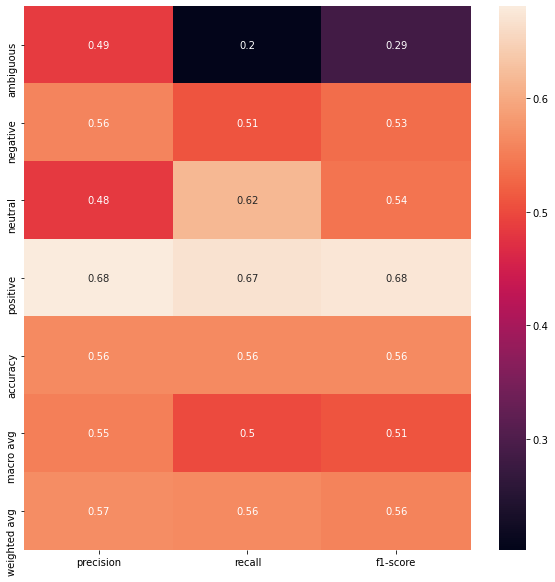

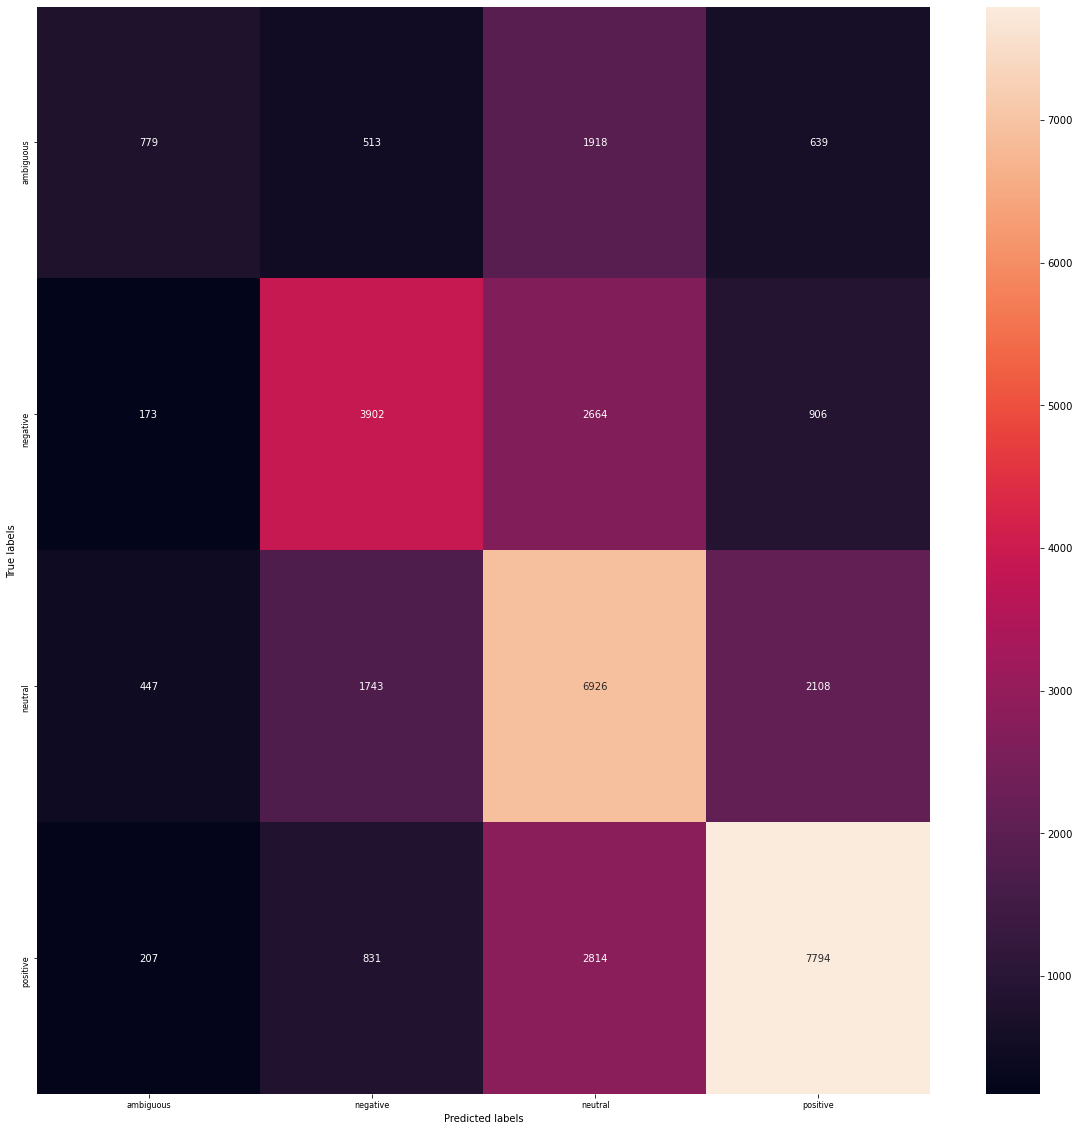

In [31]:
# Sentiment
mlp_sentiment = MLPClassifier(max_iter=100,early_stopping=True)
mlp_sentiment= mlp_sentiment.fit(X_train, y_train['Sentiment'])
y_pred=mlp_sentiment.predict(X_test)

# Classification report for 2.4
description="Multi-Layered perceptron classificator for Sentiment with default hyperparameters: one hidden layer with 100 neurons, activation= 'relu',solver='adam', alpha(regularization)=0.0001... \n"
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")


###### 2.5.4 **Better** Multinomial Naive Bayes Classifier with tf-idf

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


{'alpha': 0}


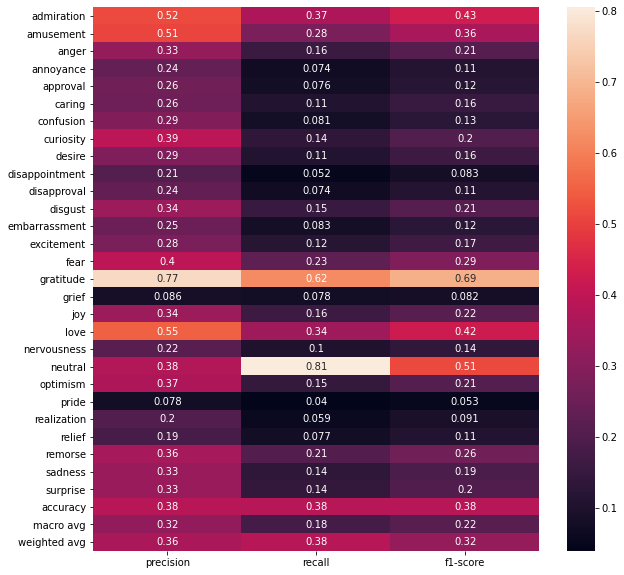

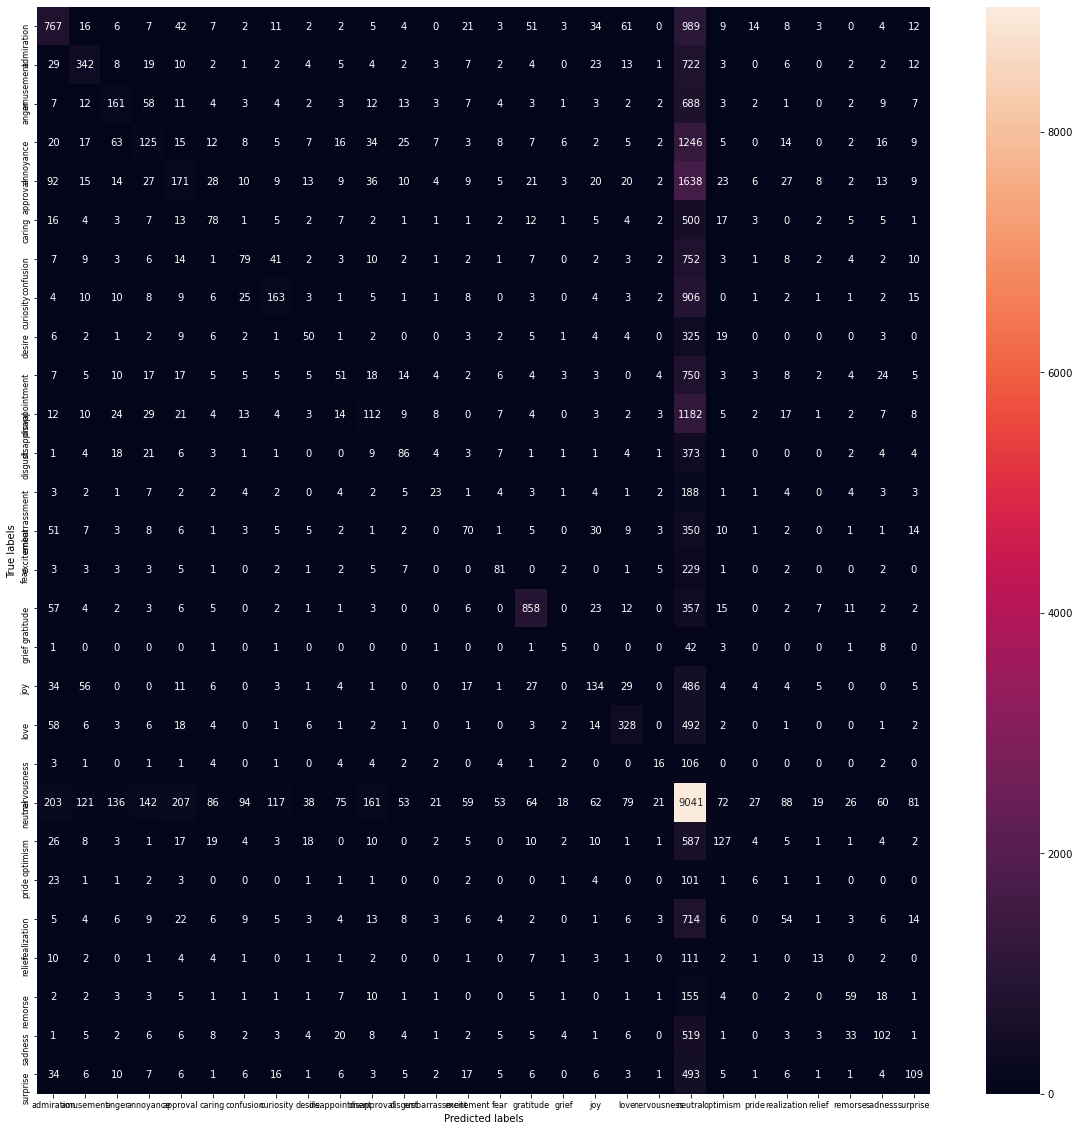

In [32]:
# Emotion
nb_emotion = MultinomialNB()


param_grid = {
    "alpha": [0.25,0.5,1.2, 0, 2]
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train['Emotion'])

# best parameter after tuning 
print(grid_search.best_params_) 
y_pred = grid_search.predict(X_test) 
   
# Classification report for 2.4
description="Better Multinomial Naive Bayes for emotion classification with hyperparameters tunned by grid search:"+json.dumps(grid_search.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")
    
    
    



Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'alpha': 0.25}


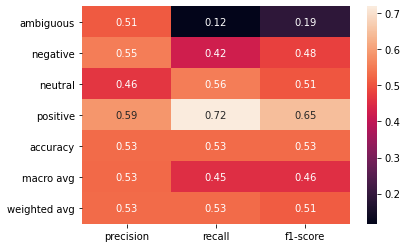

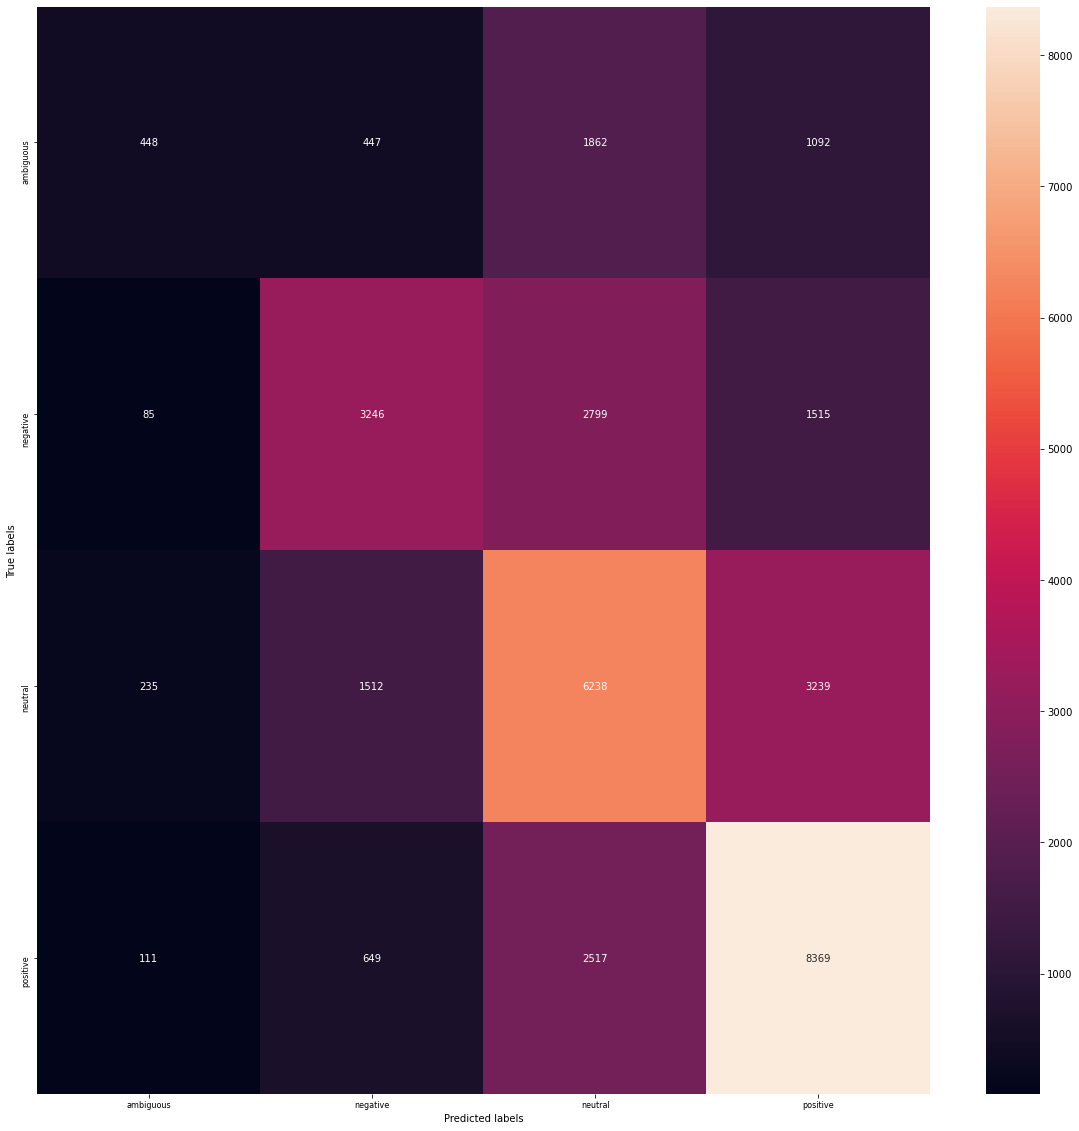

In [33]:
# Sentiment
nb_emotion = MultinomialNB()


param_grid = {
    "alpha": [0.25,0.5,1.2, 0, 2]
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train['Sentiment'])

# best parameter after tuning 
print(grid_search.best_params_) 
y_pred = grid_search.predict(X_test) 

# Classification report for 2.4
description="Better Multinomial Naive Bayes for sentiment classification with hyperparameters tunned by grid search:"+json.dumps(grid_search.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

###### 2.5.5 **Better** Decision Tree with tf-idf

dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__random_state', 'estimator__splitter', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'criterion': 'gini', 'max_depth': 700, 'min_samples_split': 0.1}


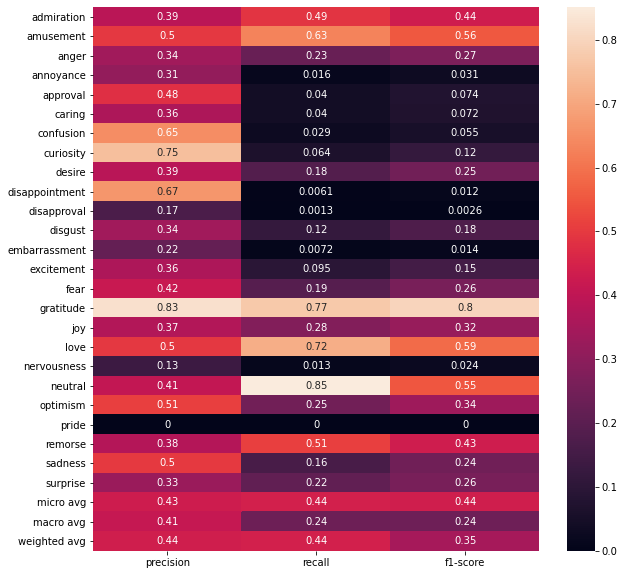

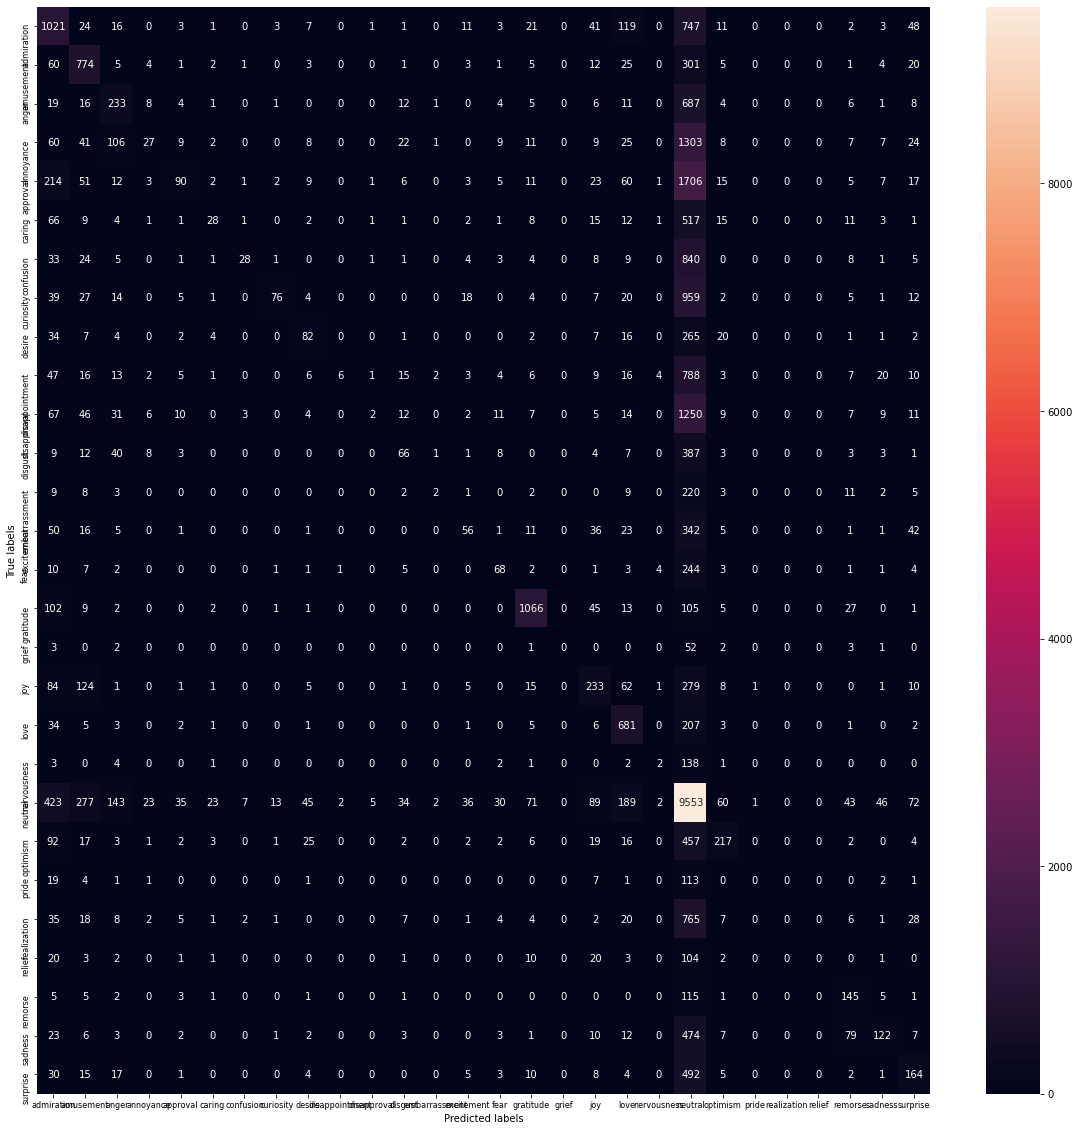

In [34]:
# Emotion
param_grid = {
    "criterion":["gini","entropy"],
    "max_depth":[700, 1000],
    "min_samples_split":[0.1,0.50,0.70]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, verbose=2, n_jobs=-1)
print(grid_search.get_params().keys())
grid_search.fit(X_train, y_train['Emotion'])

# best parameter after tuning 
print(grid_search.best_params_) 
y_pred = grid_search.predict(X_test) 
   
# Classification report for 2.4
description="Better Desicion Tree for emotion classification with hyperparameters tunned by grid search:"+json.dumps(grid_search.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")


dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__random_state', 'estimator__splitter', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'criterion': 'gini', 'max_depth': 1000, 'min_samples_split': 0.1}


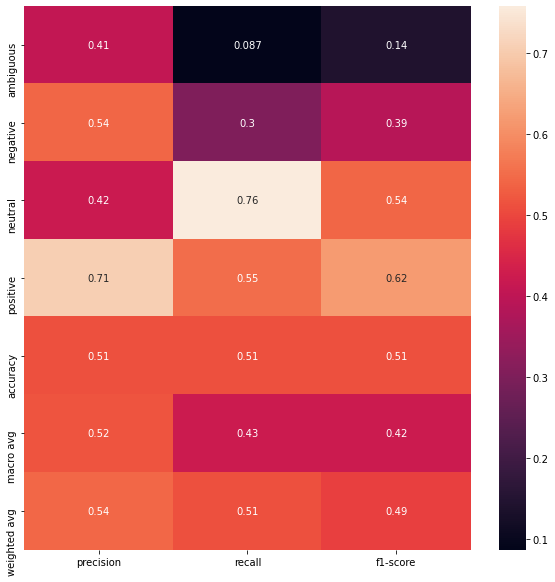

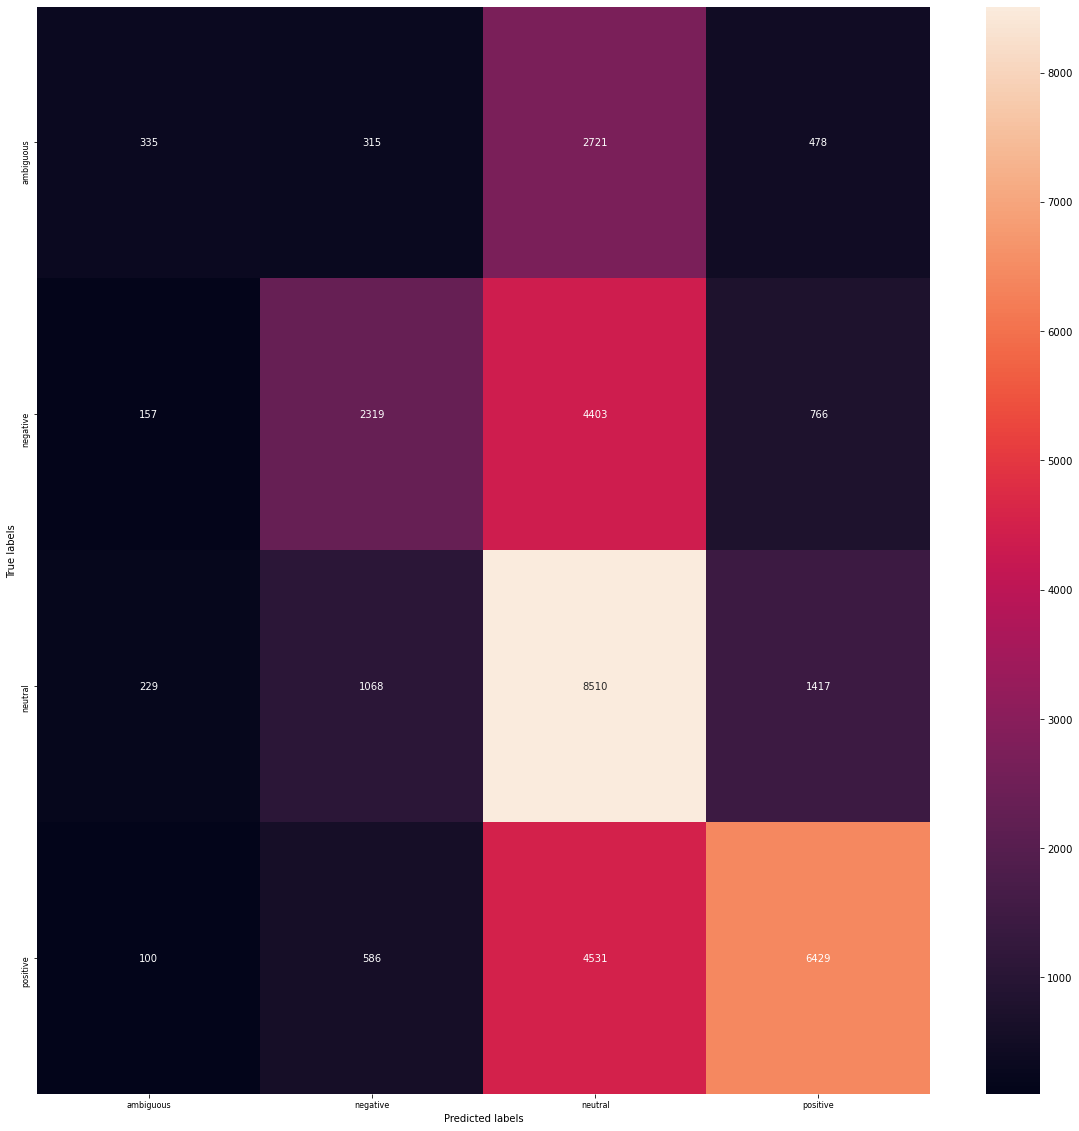

In [35]:
# Sentiment
param_grid = {
    "criterion":["gini","entropy"],
    "max_depth":[700, 1000],
    "min_samples_split":[0.1,0.50,0.70]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, verbose=2, n_jobs=-1)
print(grid_search.get_params().keys())
grid_search.fit(X_train, y_train['Sentiment'])

# best parameter after tuning 
print(grid_search.best_params_) 
y_pred = grid_search.predict(X_test) 
   
# Classification report for 2.4
description="Better Multinomial Naive Bayes for emotion classification with hyperparameters tunned by grid search:"+json.dumps(grid_search.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")



###### 2.5.6 **Better** Multilayered Perceptron with tf-idf

dict_keys(['cv', 'error_score', 'estimator__activation', 'estimator__alpha', 'estimator__batch_size', 'estimator__beta_1', 'estimator__beta_2', 'estimator__early_stopping', 'estimator__epsilon', 'estimator__hidden_layer_sizes', 'estimator__learning_rate', 'estimator__learning_rate_init', 'estimator__max_fun', 'estimator__max_iter', 'estimator__momentum', 'estimator__n_iter_no_change', 'estimator__nesterovs_momentum', 'estimator__power_t', 'estimator__random_state', 'estimator__shuffle', 'estimator__solver', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'activation': 'identity', 'hidden_layer_sizes': (3, 50), 'solver': 'adam'}


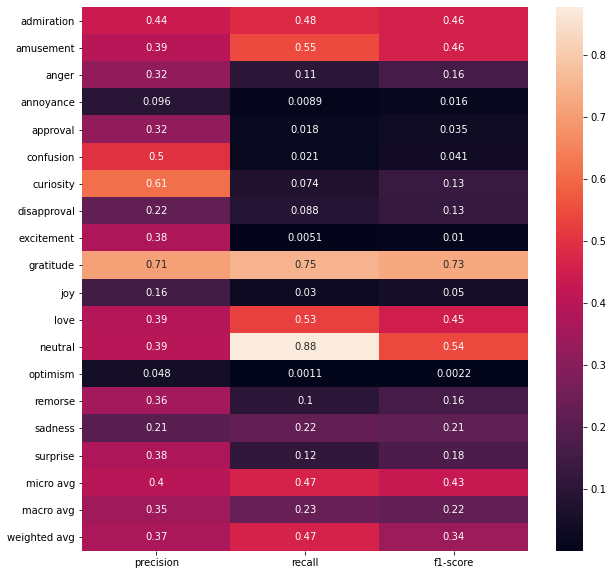

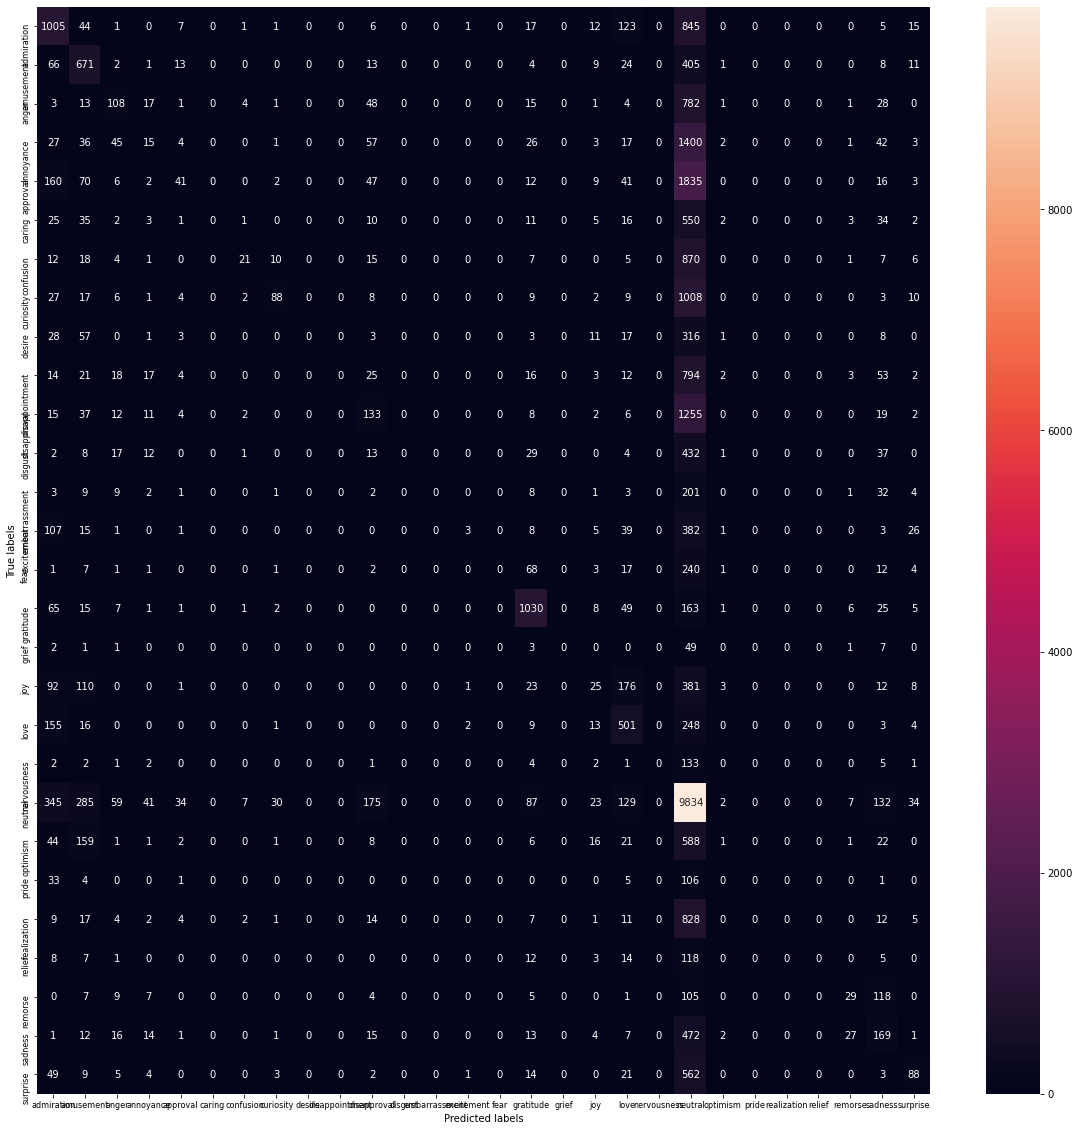

In [36]:
# Emotion
param_grid = {
    "activation":['logistic', 'identity', 'tanh', 'relu'],
    "hidden_layer_sizes":[(1,200), (3,50)],
    "solver":['adam','sgd']
}

grid_search = GridSearchCV(MLPClassifier(max_iter=100,early_stopping=True), param_grid, cv=3, verbose=2, n_jobs=-1)
print(grid_search.get_params().keys())
grid_search.fit(X_train, y_train['Emotion'])

# best parameter after tuning 
print(grid_search.best_params_) 
y_pred = grid_search.predict(X_test) 
   
# Classification report for 2.4
description="Better Multilayered Perceptron for emotion classification with hyperparameters tunned by grid search:"+json.dumps(grid_search.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")



dict_keys(['cv', 'error_score', 'estimator__activation', 'estimator__alpha', 'estimator__batch_size', 'estimator__beta_1', 'estimator__beta_2', 'estimator__early_stopping', 'estimator__epsilon', 'estimator__hidden_layer_sizes', 'estimator__learning_rate', 'estimator__learning_rate_init', 'estimator__max_fun', 'estimator__max_iter', 'estimator__momentum', 'estimator__n_iter_no_change', 'estimator__nesterovs_momentum', 'estimator__power_t', 'estimator__random_state', 'estimator__shuffle', 'estimator__solver', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'activation': 'identity', 'hidden_layer_sizes': (3, 50), 'solver': 'adam'}


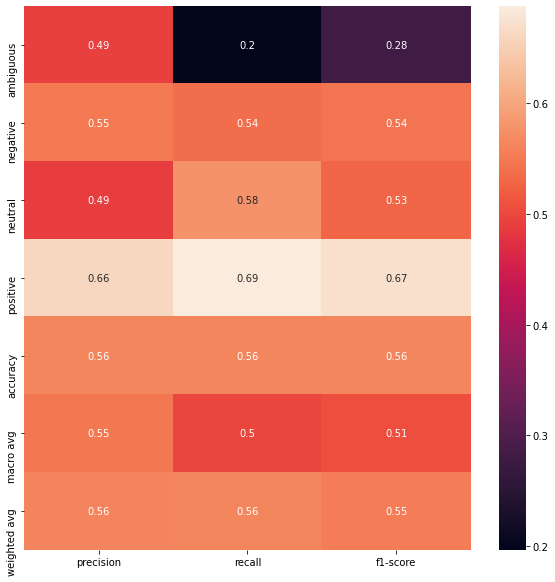

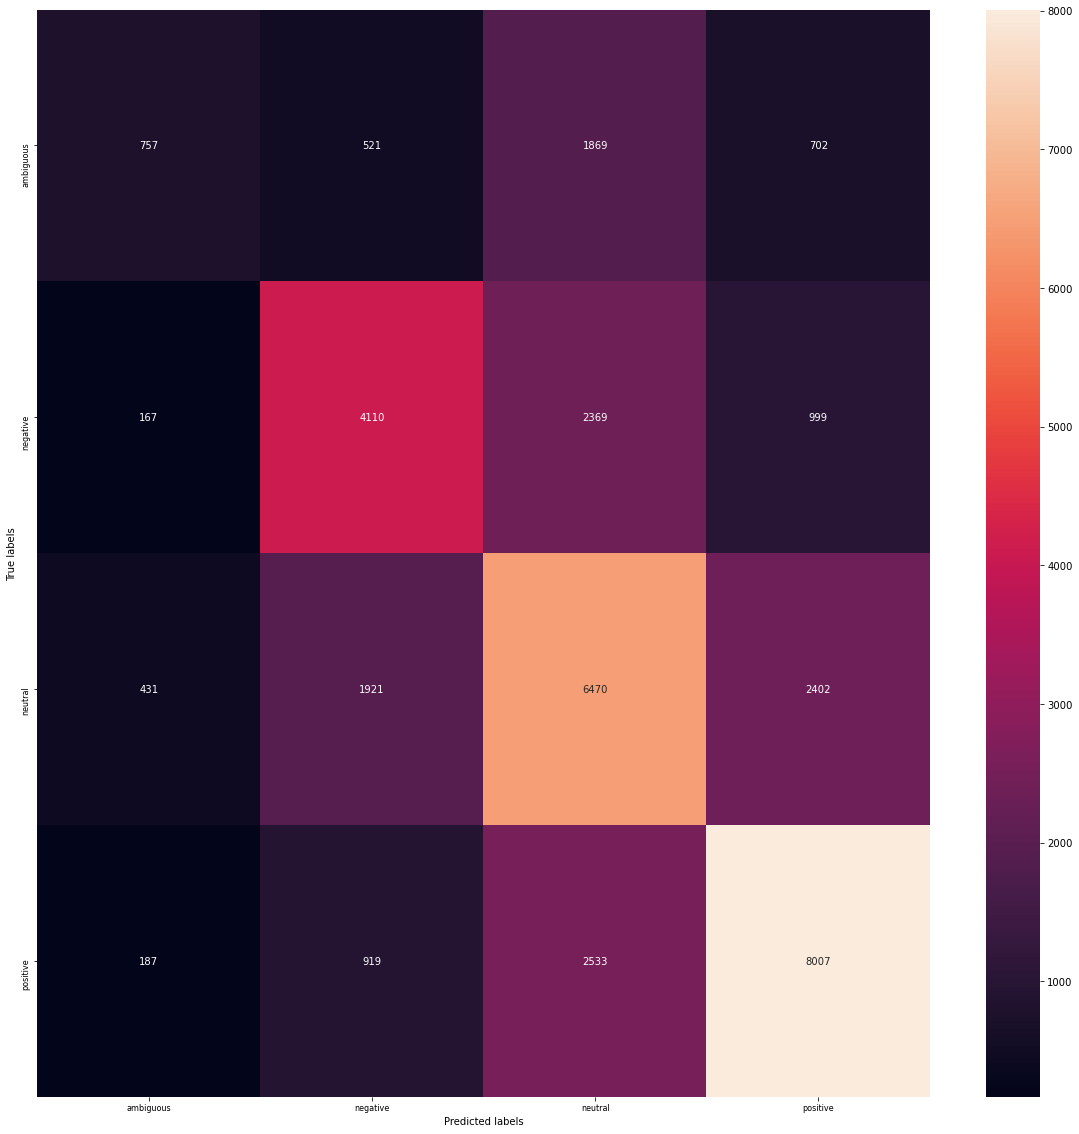

In [39]:
# Sentiment
param_grid = {
    "activation":['logistic', 'identity', 'tanh', 'relu'],
    "hidden_layer_sizes":[(1,200), (3,50)],
    "solver":['adam','sgd']
}

grid_search = GridSearchCV(MLPClassifier(max_iter=100,early_stopping=True), param_grid, cv=3, verbose=2, n_jobs=-1)
print(grid_search.get_params().keys())
grid_search.fit(X_train, y_train['Sentiment'])

# best parameter after tuning 
print(grid_search.best_params_) 
y_pred = grid_search.predict(X_test) 
   
# Classification report for 2.4
description="Better Multilayered Perceptron for sentiment classification with hyperparameters tunned by grid search:"+json.dumps(grid_search.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
fig, ax = plt.subplots(figsize=(10,10)) 
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Sentiment'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")



## 3.Embeding as features

In [40]:
builder.writeln("**Embedings as features**")

#### 3.1 Load pretrained model

In [41]:
#importing the model
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

#### 3.2 Tokenize the post

In [42]:
nltk.download('punkt')
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df[['Sentiment','Emotion']], test_size=0.20)
X_train_tokenized=X_train.apply(word_tokenize)
X_test_tokenized=X_test.apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a-zam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
tokens=set()
X_train_tokenized.apply(lambda x: tokens.update(x))
print('The total number of unique tokens is:', len(tokens))

The total number of unique tokens is: 41099


#### 3.3 Compute the embedding of the post

In [55]:
def embed(df,model,num):
    embeddings=[]
    not_found=0
    for post in df:
        current=np.zeros(num)
        num_words=0
        for word in post :
            if word in model:
                num_words+=1
                current+=model[word]
        if num_words!=0:
            current=current/num_words
        else:
            not_found+=1
        embeddings.append(current)
    return embeddings,not_found

In [46]:
X_train_embeded, rate1= embed(X_train_tokenized,model)
X_test_embeded, rate2= embed(X_test_tokenized,model)


#### 3.4 Overall hit rates

In [47]:
print("The percentage of positevely getting an non null embedding in the train set is", (len(X_train_tokenized)-rate1)/len(X_train_tokenized))
print("The percentage of positevely getting an non null embedding in the test set is", (len(X_train_tokenized)-rate2)/len(X_train_tokenized))

The percentage of positevely getting an non null embedding in the train set is 0.9995052962402514
The percentage of positevely getting an non null embedding in the test set is 0.9998617739494821


#### 3.5 Base Multi-Layered perceptron

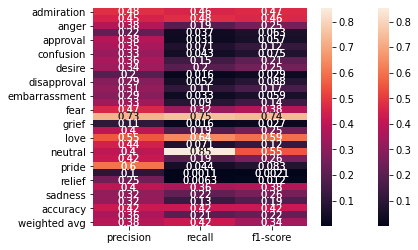

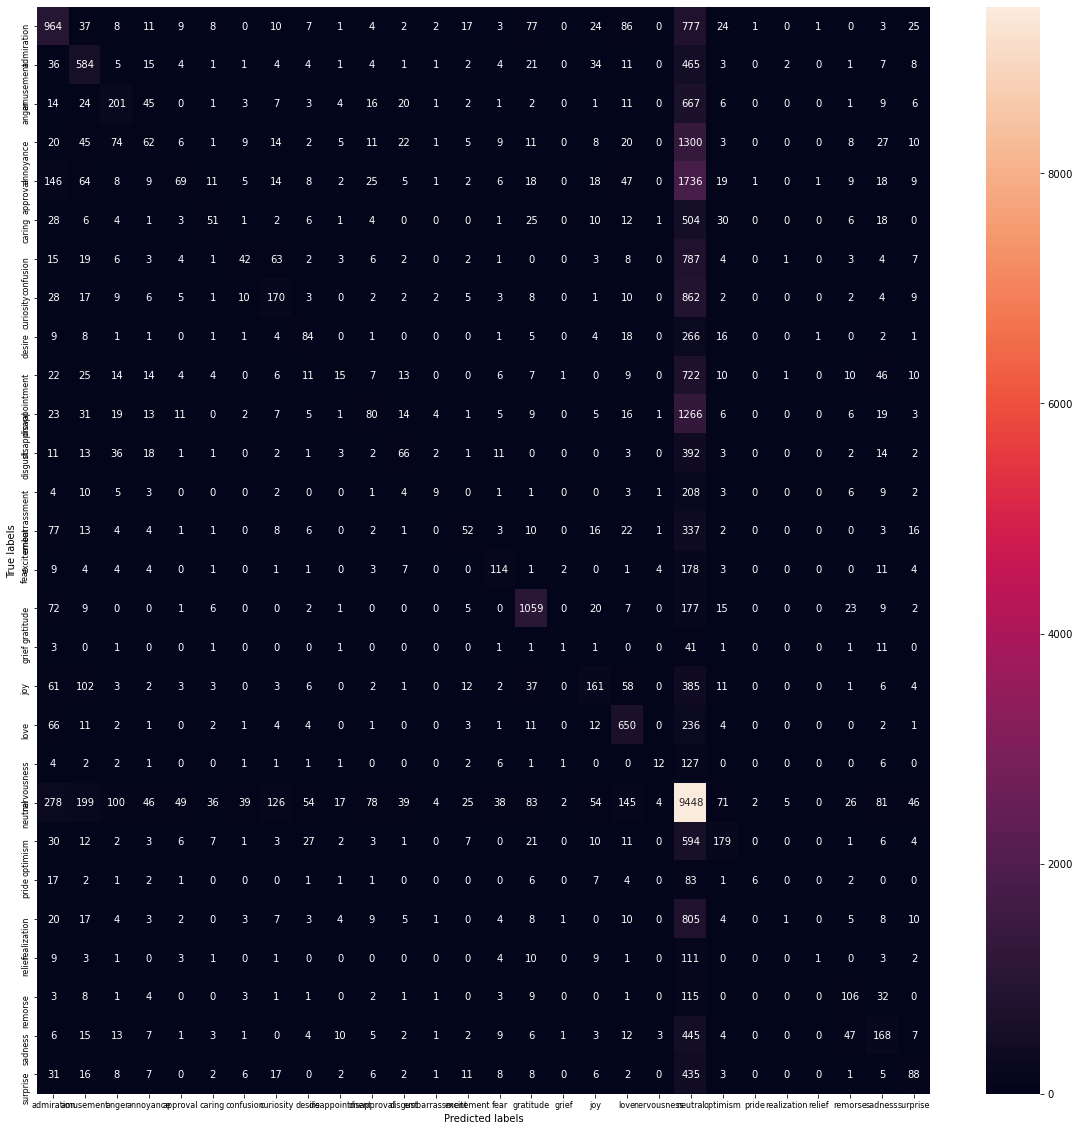

In [48]:
# Emotion
mlp_emotion = MLPClassifier(max_iter=100,early_stopping=True)
mlp_emotion= mlp_emotion.fit(X_train_embeded, y_train['Emotion'])
y_pred=mlp_emotion.predict(X_test_embeded)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

# Classification report 
description="Multi-Layered perceptron classificator using the GoogleNews-vectors-negative300 pretrained model for Emotion classification with default hyperparameters: one hidden layer with 100 neurons, activation= 'relu',solver='adam', alpha(regularization)=0.0001... \n"
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

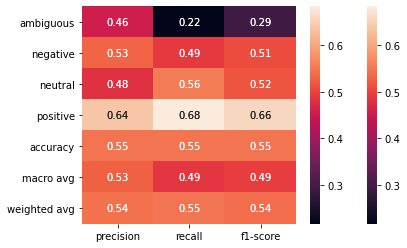

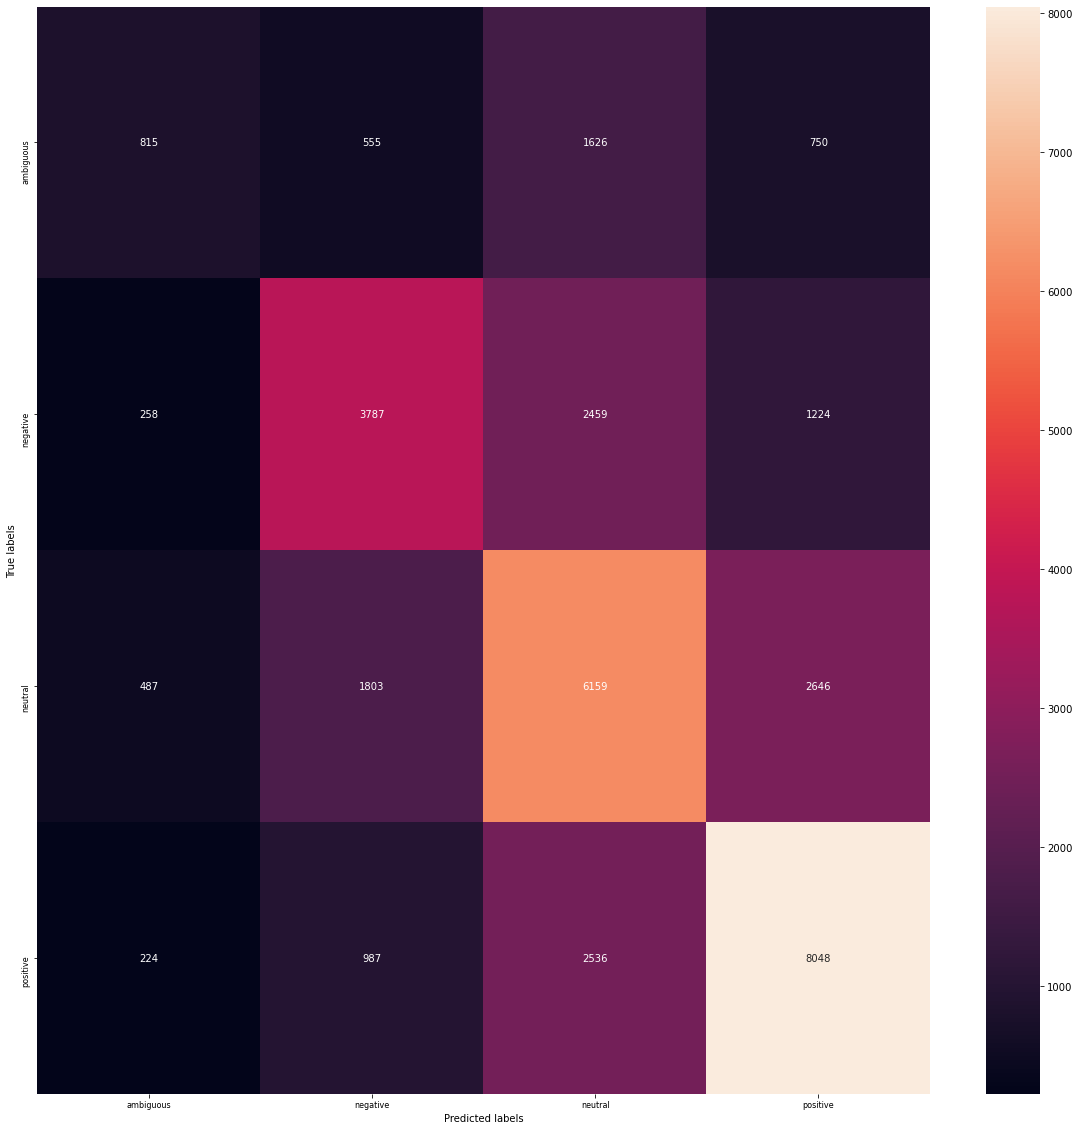

In [49]:
# Sentiment
mlp_emotion = MLPClassifier(max_iter=100,early_stopping=True)
mlp_emotion= mlp_emotion.fit(X_train_embeded, y_train['Sentiment'])
y_pred=mlp_emotion.predict(X_test_embeded)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

# Classification report 
description="Multi-Layered perceptron classificator using the GoogleNews-vectors-negative300 pretrained model for Sentiment classfication with default hyperparameters: one hidden layer with 100 neurons, activation= 'relu',solver='adam', alpha(regularization)=0.0001... \n"
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

#### 3.5 Better Multi-Layered perceptron

dict_keys(['cv', 'error_score', 'estimator__activation', 'estimator__alpha', 'estimator__batch_size', 'estimator__beta_1', 'estimator__beta_2', 'estimator__early_stopping', 'estimator__epsilon', 'estimator__hidden_layer_sizes', 'estimator__learning_rate', 'estimator__learning_rate_init', 'estimator__max_fun', 'estimator__max_iter', 'estimator__momentum', 'estimator__n_iter_no_change', 'estimator__nesterovs_momentum', 'estimator__power_t', 'estimator__random_state', 'estimator__shuffle', 'estimator__solver', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'activation': 'tanh', 'hidden_layer_sizes': (2, 30), 'solver': 'adam'}


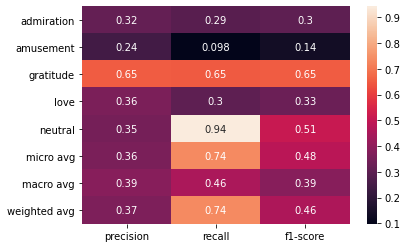

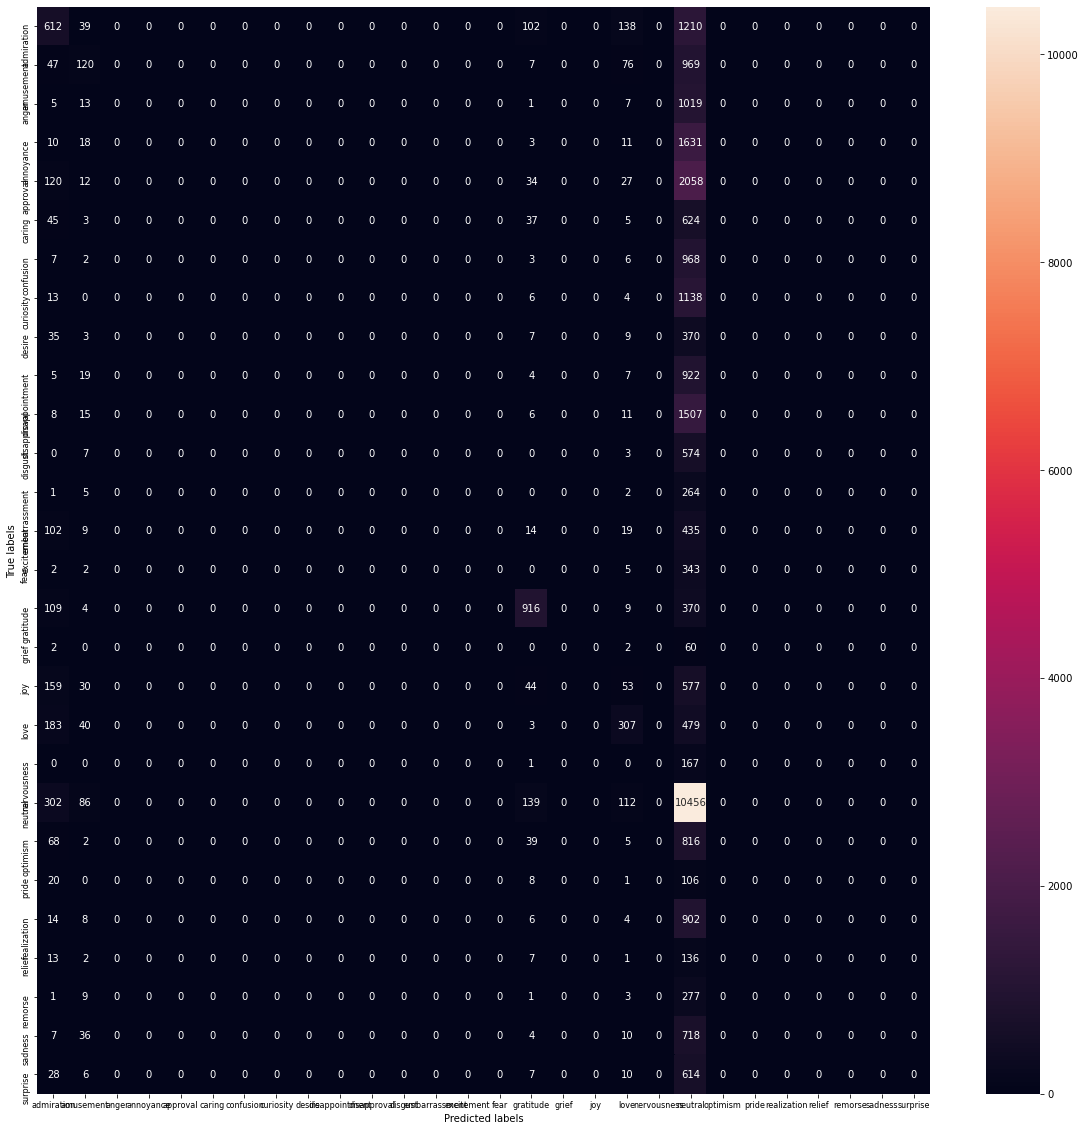

In [50]:
# Emotion
param_grid = {
    "activation":['logistic', 'identity', 'tanh', 'relu'],
    "hidden_layer_sizes":[(1,100), (2,30)],
    "solver":['adam','sgd']
}

grid_search_emotion = GridSearchCV(MLPClassifier(max_iter=100,early_stopping=True), param_grid, cv=3, verbose=2, n_jobs=-1)
print(grid_search_emotion.get_params().keys())
grid_search_emotion.fit(X_train_embeded, y_train['Emotion'])

# best parameter after tuning 
print(grid_search_emotion.best_params_) 
y_pred = grid_search_emotion.predict(X_test_embeded) 
   
# Classification report for 2.4
description="Better Multilayered Perceptron using the GoogleNews-vectors-negative300 pretrained model for emotion classification with hyperparameters tunned by grid search:"+ json.dumps(grid_search_emotion.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))    
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")



dict_keys(['cv', 'error_score', 'estimator__activation', 'estimator__alpha', 'estimator__batch_size', 'estimator__beta_1', 'estimator__beta_2', 'estimator__early_stopping', 'estimator__epsilon', 'estimator__hidden_layer_sizes', 'estimator__learning_rate', 'estimator__learning_rate_init', 'estimator__max_fun', 'estimator__max_iter', 'estimator__momentum', 'estimator__n_iter_no_change', 'estimator__nesterovs_momentum', 'estimator__power_t', 'estimator__random_state', 'estimator__shuffle', 'estimator__solver', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'activation': 'tanh', 'hidden_layer_sizes': (2, 30), 'solver': 'sgd'}


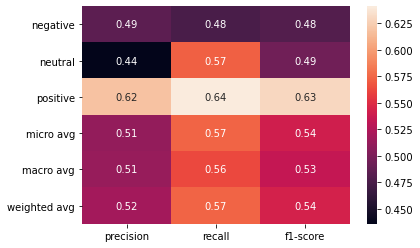

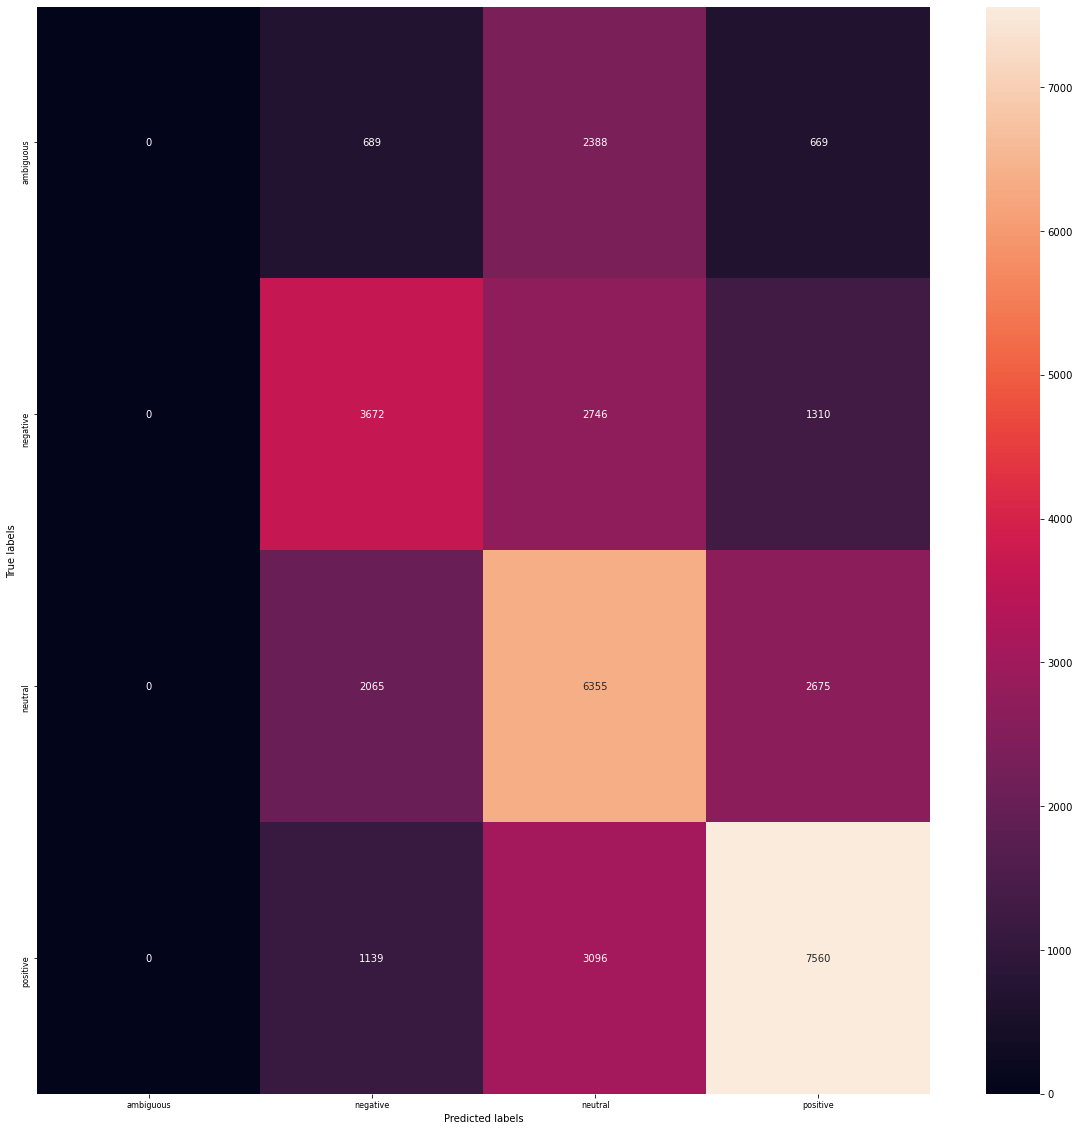

In [51]:
# Sentiment
param_grid = {
    "activation":['logistic', 'identity', 'tanh', 'relu'],
    "hidden_layer_sizes":[(1,100), (2,30)],
    "solver":['adam','sgd']
}

grid_search_sentiment = GridSearchCV(MLPClassifier(max_iter=100,early_stopping=True), param_grid, cv=3, verbose=2, n_jobs=-1)
print(grid_search_sentiment.get_params().keys())
grid_search_sentiment.fit(X_train_embeded, y_train['Sentiment'])

# best parameter after tuning 
print(grid_search_sentiment.best_params_) 
y_pred = grid_search_sentiment.predict(X_test_embeded) 
   
# Classification report for 2.4
description="Better Multilayered Perceptron using the GoogleNews-vectors-negative300 pretrained model for emotion classification with hyperparameters tunned by grid search:"+json.dumps(grid_search_sentiment.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")



#### 3.8 Own exploration: best performing model but with 2 other English pretrained embedding models

Using the two very know pretrained models: glove and fastext(with wikipedia.simple)

In [52]:
word_vectors = model_api.load("glove-wiki-gigaword-50")

In [56]:
X2_train_embeded, rate1= embed(X_train_tokenized,word_vectors,50)
X2_test_embeded, rate2= embed(X_test_tokenized,word_vectors,50)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


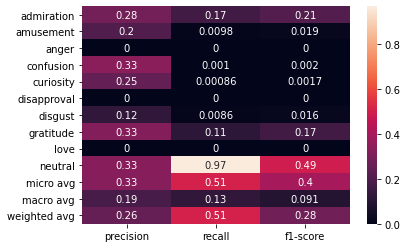

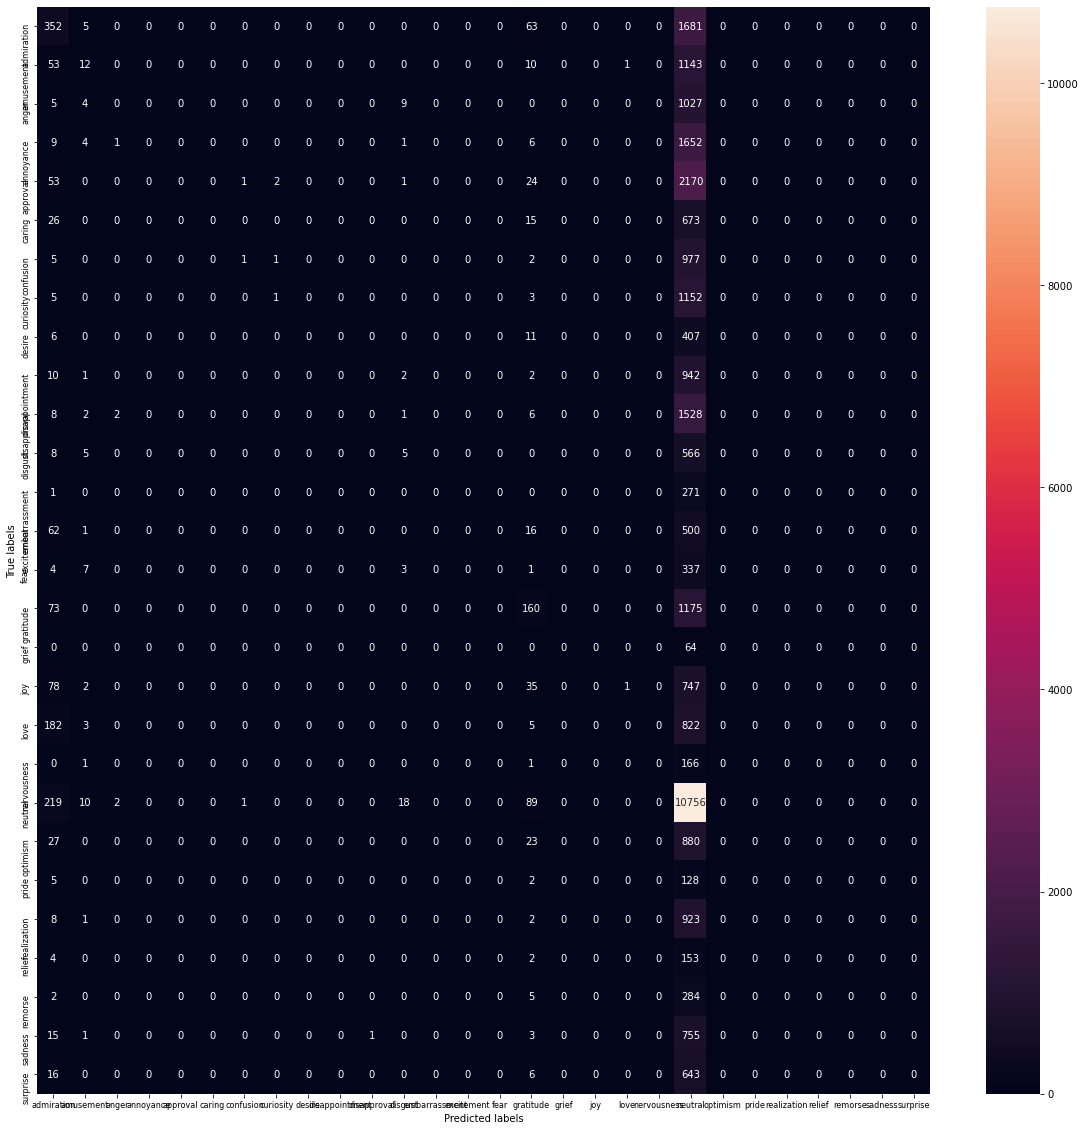

In [59]:
#Emotion
grid_search_emotion.fit(X2_train_embeded, y_train['Emotion'])
y_pred = grid_search_emotion.predict(X2_test_embeded)

# Classification report for 2.4
description="Better Multilayered Perceptron using the glove-wiki-gigaword-50 pretrained model for emotion classification with hyperparameters tunned by grid search:"+ json.dumps(grid_search_emotion.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


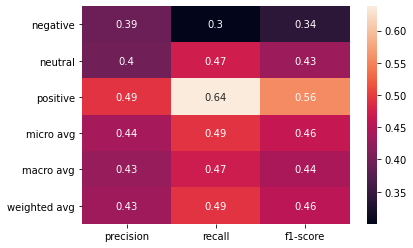

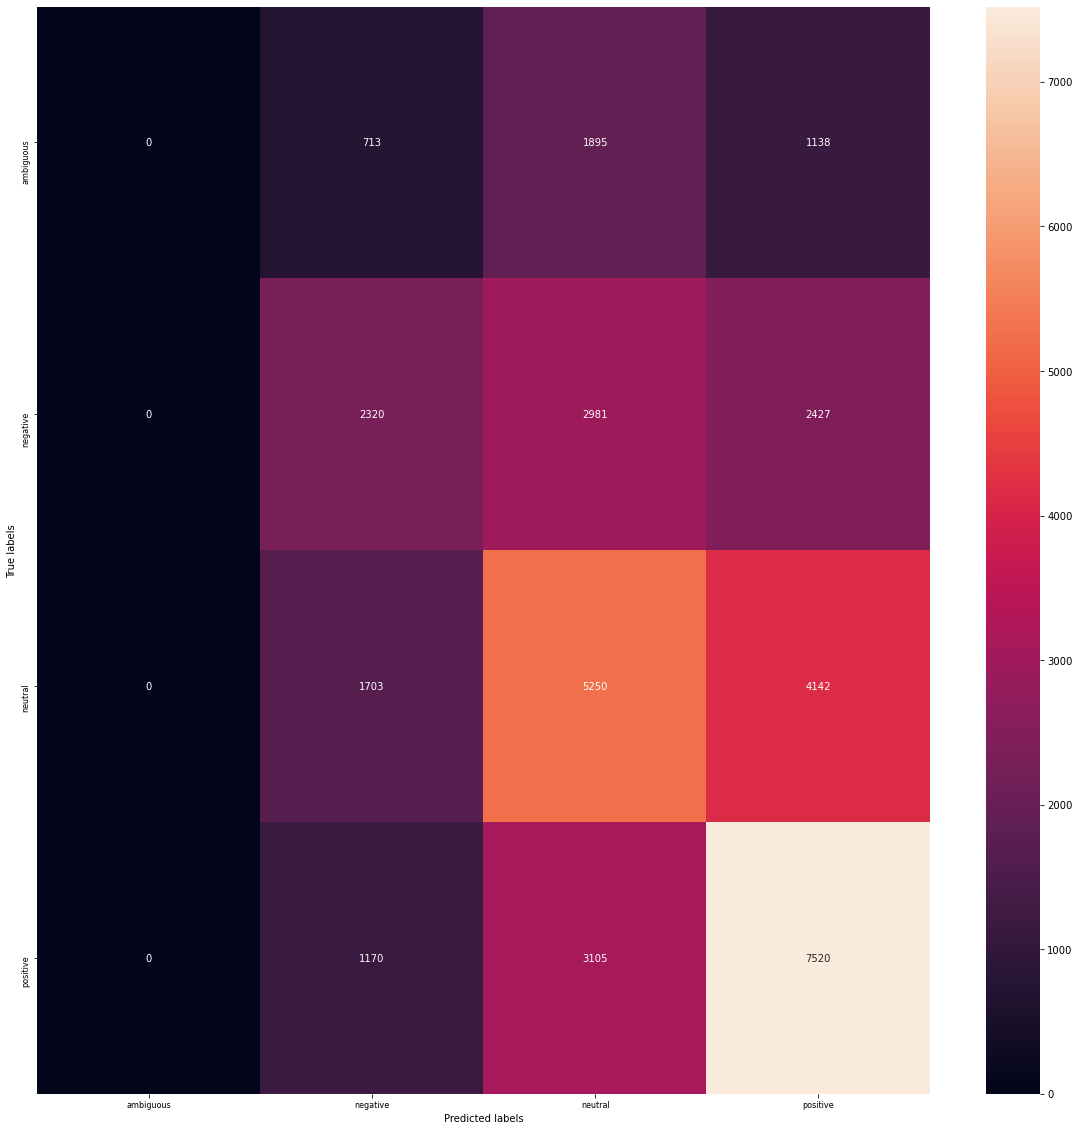

In [61]:
#Sentiment
grid_search_sentiment.fit(X2_train_embeded, y_train['Sentiment'])
y_pred = grid_search_sentiment.predict(X2_test_embeded)

# Classification report for 2.4
description="Better Multilayered Perceptron using the glove-wiki-gigaword-50 pretrained model for Sentiment classification with hyperparameters tunned by grid search:"+ json.dumps(grid_search_sentiment.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png")

In [91]:
model_text8 = model_api.load("text8")

In [92]:
X3_train_embeded, rate1= embed(X_train_tokenized,model_text8,300)
X3_test_embeded, rate2= embed(X_test_tokenized,model_text8,300)

KeyboardInterrupt: 

In [ ]:
#Emotion
grid_search_emotion.fit(X3_train_embeded, y_train['Emotion'])
y_pred = grid_search_emotion.predict(X3_test_embeded)

# Classification report for 2.4
description="Better Multilayered Perceptron using the fastext wiki.simple.bin pretrained model for emotion classification with hyperparameters tunned by grid search:"+ json.dumps(grid_search_emotion.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Emotion'], y_pred,labels=np.unique(y_pred),output_dict=True)
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Emotion'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Emotion'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png)

In [ ]:
#Sentiment
grid_search_sentiment.fit(X3_train_embeded, y_train['Sentiment'])
y_pred = grid_search_sentiment.predict(X3_test_embeded)

# Classification report for 2.4
description="Better Multilayered Perceptron using the fastext wiki.simple.bin pretrained model for Sentiment classification with hyperparameters tunned by grid search:"+ json.dumps(grid_search_sentiment.best_params_)
builder.write(description)
clf_report=classification_report(y_test['Sentiment'], y_pred,labels=np.unique(y_pred),output_dict=True)
smap=sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
fig = smap.get_figure()
fig.savefig("report.png")
builder.write("Classification Report: \n")
builder.insert_image("report.png")
builder.write("\n")
builder.write("Confusion Matrix \n")
cf_matrix=confusion_matrix(y_test['Sentiment'], y_pred)
fig, ax = plt.subplots(figsize=(20,20))
cmap=sns.heatmap(cf_matrix, annot=True,fmt='g', ax=ax)
axis=pd.crosstab(y_test['Sentiment'], y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
axis=list(axis.index)[:-1]
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.xaxis.set_ticklabels(axis);
ax.yaxis.set_ticklabels(axis)
fig = cmap.get_figure()
fig.savefig("cmatrix.png")
builder.insert_image("cmatrix.png)

In [93]:
doc.save("performance.docx")